In [320]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/combat-data/Combat_Data.csv


In [321]:
df = pd.read_csv('/kaggle/input/combat-data/Combat_Data.csv', engine = 'python', encoding = 'euc-kr')
display(df.head())
print(df.columns)

사료 번호  연대   대대  중대    기타소속      년도    월     일          날짜 지역 분류  지역  일본군수  \
0   사료1  51  NaN  11     NaN  1907.0  8.0  20.0  1907-08-20   경기도  여주   NaN   
1   사료1  51  2대대   5  아다치 지대  1907.0  8.0  22.0  1907-08-22  충청북도  제천   NaN   
2   사료1  51  NaN   2  아다치 지대  1907.0  8.0  22.0  1907-08-22  충청북도  충주   NaN   
3   사료1   1  NaN   9   충주수비대  1907.0  8.0  23.0  1907-08-23  충청북도  충주   NaN   
4   사료1  51  NaN   8  요코에 소대  1907.0  8.0  24.0  1907-08-24  충청북도  단양   NaN   

   의병수  일본군사상자 의병사망 한국군사망 특이사항 의병 지휘부  
0  300     1.0   40        NaN    NaN  
1   불명     NaN    3   NaN  NaN    NaN  
2   60     NaN   10    20  NaN    NaN  
3  200     1.0   26   NaN  NaN    NaN  
4   15     NaN    1   NaN  NaN    NaN

Index(['사료 번호', '연대', '대대', '중대', '기타소속', '년도', '월', '일', '날짜', '지역 분류', '지역',
       '일본군수', '의병수', '일본군사상자', '의병사망', '한국군사망', '특이사항', '의병 지휘부'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

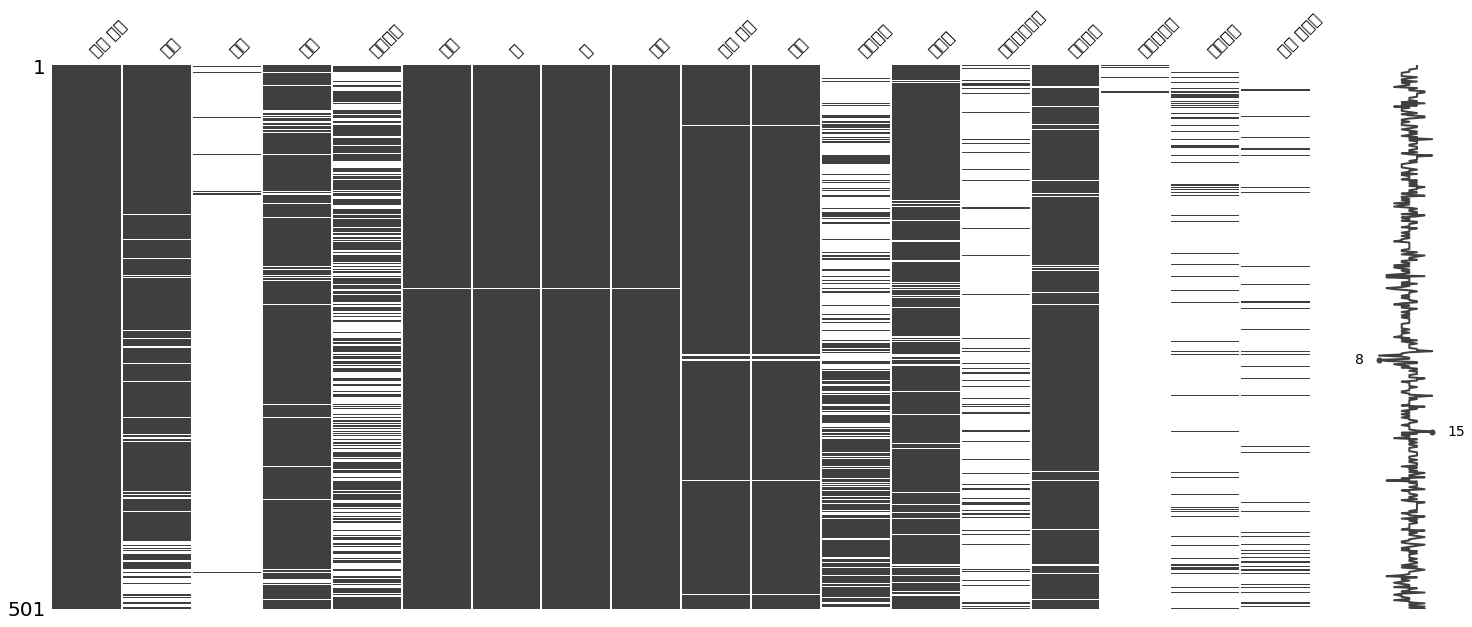

사료 번호       0
연대         59
대대        493
중대         35
기타소속      219
년도          1
월           1
일           1
날짜          1
지역 분류       7
지역          7
일본군수      256
의병수        41
일본군사상자    446
의병사망       19
한국군사망     496
특이사항      443
의병 지휘부    460
dtype: int64


In [322]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(df)
plt.show()

print(df.isnull().sum()) #결측치 확인

> # Data Preprocessing

산발적 전투 사건들을 모아놓은 데이터셋이라고 했으니까 소속이, 특이사항(딱히 일반화할만한 특징이 없더라고)drop.
의병지휘부, 한국군 사망도(결측치가 너무 많아서& 딱히 의미 없는 데이터라)은 drop할게
년도, 월, 일도 결국 날짜에 포함되어 있으니 다 drop.

In [323]:
df1 = df.drop(['사료 번호', '연대', '대대', '중대', '기타소속', '특이사항', '의병 지휘부', '한국군사망', '년도', '월', '일', '일본군수'], axis = 1)
df1.tail()

날짜 지역 분류  지역  의병수  일본군사상자 의병사망
496  1908-05-19  전라북도  순창   50     NaN    9
497  1908-05-19  전라남도  화순   85     NaN   70
498  1908-05-31  전라남도  장성   71     2.0   70
499  1908-06-04  충청북도  봉화  100     NaN   70
500  1908-06-07  충청북도  봉화  150     2.0   48

결측치 값이 너무 많아서 제대로 분석이 될는지 모르겠는데 일단 날짜나 지역 별로 묶어 볼게. 
지역값도 너무 많아서 도별로만 묶어볼거야.

그전에 일단 일본군사상자 및 의병수, 의병사망  Nan값(결측치)은 전부 0으로 채워넣을거야.(Imputation)

In [324]:
df1['일본군사상자'] = df1['일본군사상자'].fillna(0)
df1['의병수'] = df1['의병수'].fillna(0)
df1['의병사망'] = df1['의병사망'].fillna(0)
df1

날짜 지역 분류  지역  의병수  일본군사상자 의병사망
0    1907-08-20   경기도  여주  300     1.0   40
1    1907-08-22  충청북도  제천   불명     0.0    3
2    1907-08-22  충청북도  충주   60     0.0   10
3    1907-08-23  충청북도  충주  200     1.0   26
4    1907-08-24  충청북도  단양   15     0.0    1
..          ...   ...  ..  ...     ...  ...
496  1908-05-19  전라북도  순창   50     0.0    9
497  1908-05-19  전라남도  화순   85     0.0   70
498  1908-05-31  전라남도  장성   71     2.0   70
499  1908-06-04  충청북도  봉화  100     0.0   70
500  1908-06-07  충청북도  봉화  150     2.0   48

[501 rows x 6 columns]

In [325]:
df1 = df1.drop('지역', axis = 1)
df1

날짜 지역 분류  의병수  일본군사상자 의병사망
0    1907-08-20   경기도  300     1.0   40
1    1907-08-22  충청북도   불명     0.0    3
2    1907-08-22  충청북도   60     0.0   10
3    1907-08-23  충청북도  200     1.0   26
4    1907-08-24  충청북도   15     0.0    1
..          ...   ...  ...     ...  ...
496  1908-05-19  전라북도   50     0.0    9
497  1908-05-19  전라남도   85     0.0   70
498  1908-05-31  전라남도   71     2.0   70
499  1908-06-04  충청북도  100     0.0   70
500  1908-06-07  충청북도  150     2.0   48

[501 rows x 5 columns]

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_

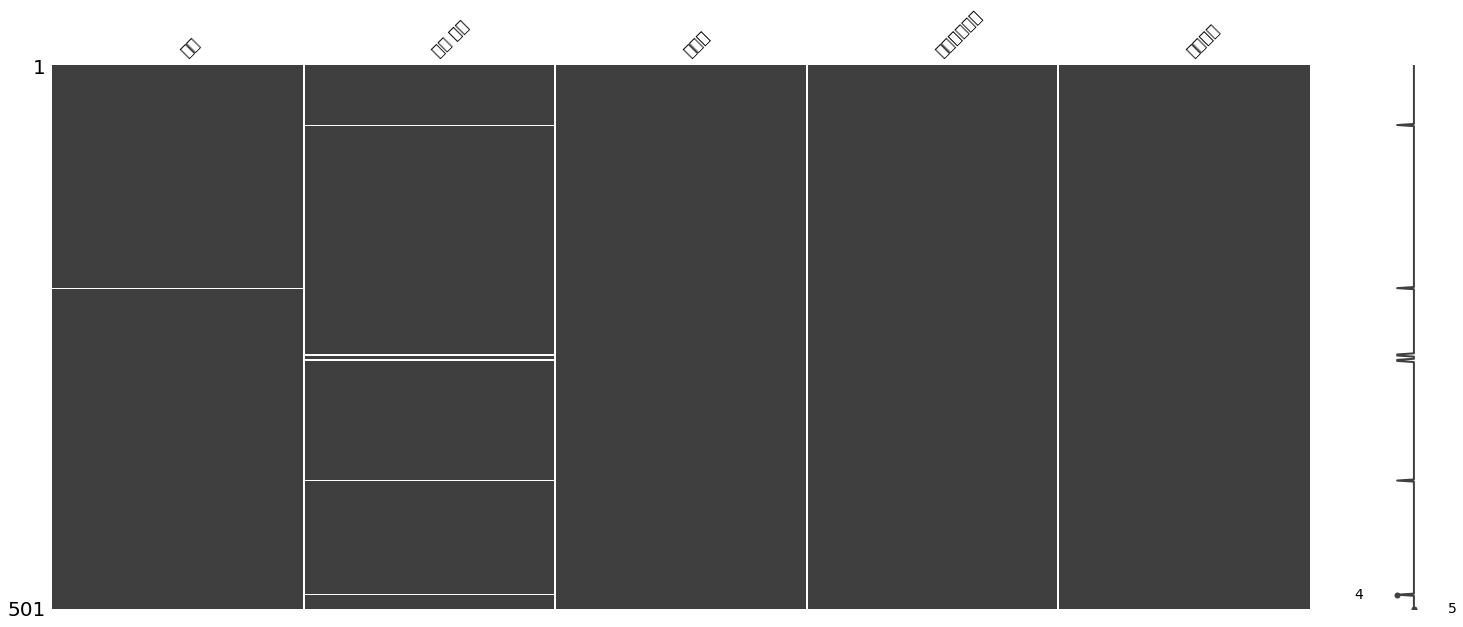

날짜        1
지역 분류     7
의병수       0
일본군사상자    0
의병사망      0
dtype: int64


In [326]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(df1)
plt.show()

print(df1.isnull().sum()) #결측치 확인

여전히 지역분류, 날짜에는 na값이 있어서 이건 쓸모없는 값이라고 간주하고 행을 drop할거야.
지금까지 전처리한 결과를 보면 결국 지역이나 날짜에 따른 추이만 볼 수 있을거 같은데 결측치가 있으면 분석이 안 되거든.


In [327]:
df1.dropna(axis = 0, how = 'any' ,inplace = True)
df1

날짜 지역 분류  의병수  일본군사상자 의병사망
0    1907-08-20   경기도  300     1.0   40
1    1907-08-22  충청북도   불명     0.0    3
2    1907-08-22  충청북도   60     0.0   10
3    1907-08-23  충청북도  200     1.0   26
4    1907-08-24  충청북도   15     0.0    1
..          ...   ...  ...     ...  ...
496  1908-05-19  전라북도   50     0.0    9
497  1908-05-19  전라남도   85     0.0   70
498  1908-05-31  전라남도   71     2.0   70
499  1908-06-04  충청북도  100     0.0   70
500  1908-06-07  충청북도  150     2.0   48

[493 rows x 5 columns]

In [328]:
df2 = df1['의병수'] == '불명'
df2.sum() #'의병수'가 불명인 값은 3개인데 역사적 사실을 왜곡할 수 없으니까(mean 값으로 채워넣는다던가) 이것도 drop

3

In [329]:
not_string = df1['의병수'] != '불명'
df_final = df1[not_string]

non_string = df1['의병사망'] != '불명'
df_final = df1[non_string]

df2 = df_final['의병수'] == '불명'
df3 = df_final['의병사망'] == '불명'
print(df2.sum())
print(df3.sum())

3
0


In [330]:
not_string = df_final['의병수'] != '미상'
df_final = df_final[not_string]

not_string = df_final['의병수'] != '불명'
df_final = df_final[not_string]


not_string = df_final['의병사망'] != '미상'
df_final = df_final[not_string]

not_string = df_final['의병사망'] != '불명'
df_final = df_final[not_string]

In [331]:
df_final.rename(columns = {"날짜": "Date", "지역 분류": "Region", "의병수": "Chosun_soldiers", "일본군사상자": "Dead_Japanese_soldiers", "의병사망": "Dead_Chosun_soldiers"}, inplace = True)
 
print(df_final)
print(list(df_final['Region'].unique()))

df_final = df_final.replace('경기도', 'Gyeonggido')
df_final = df_final.replace('강원도', 'Gangwondo')
df_final = df_final.replace('경상북도', 'Gyeonsangbukdo')
df_final = df_final.replace('경상남도', 'Gyeonsangnamdo')
df_final = df_final.replace('황해도', 'Hwanghaedo')
df_final = df_final.replace('함경도', 'Hamgyeongdo')
df_final = df_final.replace('평안도', 'Pyeongando')
df_final = df_final.replace('충청남도', 'Chungcheongnamdo')
df_final = df_final.replace('충청북도', 'Chungcheongbukdo')
df_final = df_final.replace('전라북도', 'Jeollabukdo')
df_final = df_final.replace('전라남도', 'Jeollanamdo')

print(df_final)
# 한글폰트 적용이 도저히 안 돼서 영어로 이름 바꾼다.

           Date Region Chosun_soldiers  Dead_Japanese_soldiers  \
0    1907-08-20    경기도             300                     1.0   
2    1907-08-22   충청북도              60                     0.0   
3    1907-08-23   충청북도             200                     1.0   
4    1907-08-24   충청북도              15                     0.0   
5    1907-08-26    경기도              70                     0.0   
..          ...    ...             ...                     ...   
496  1908-05-19   전라북도              50                     0.0   
497  1908-05-19   전라남도              85                     0.0   
498  1908-05-31   전라남도              71                     2.0   
499  1908-06-04   충청북도             100                     0.0   
500  1908-06-07   충청북도             150                     2.0   

    Dead_Chosun_soldiers  
0                     40  
2                     10  
3                     26  
4                      1  
5                     20  
..                   ...  
496               

In [332]:
df_final['Dead_Chosun_soldiers'] = df_final['Dead_Chosun_soldiers'].astype('float')
df_final['Chosun_soldiers'] = df_final['Chosun_soldiers'].astype('float')

# Data Analysis

In [333]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (40,28)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.rc('font', size = 25)

In [334]:
df_date = df_final.drop('Region', axis = 1)
df_region = df_final.drop('Date', axis = 1)

df_date = df_date.set_index("Date")
df_region = df_region.set_index("Region")

display(df_date)
display(df_region)

Chosun_soldiers  Dead_Japanese_soldiers  Dead_Chosun_soldiers
Date                                                                     
1907-08-20            300.0                     1.0                  40.0
1907-08-22             60.0                     0.0                  10.0
1907-08-23            200.0                     1.0                  26.0
1907-08-24             15.0                     0.0                   1.0
1907-08-26             70.0                     0.0                  20.0
...                     ...                     ...                   ...
1908-05-19             50.0                     0.0                   9.0
1908-05-19             85.0                     0.0                  70.0
1908-05-31             71.0                     2.0                  70.0
1908-06-04            100.0                     0.0                  70.0
1908-06-07            150.0                     2.0                  48.0

[453 rows x 3 columns]

Chosun_soldiers  Dead_Japanese_soldiers  \
Region                                                      
Gyeonggido                  300.0                     1.0   
Chungcheongbukdo             60.0                     0.0   
Chungcheongbukdo            200.0                     1.0   
Chungcheongbukdo             15.0                     0.0   
Gyeonggido                   70.0                     0.0   
...                           ...                     ...   
Jeollabukdo                  50.0                     0.0   
Jeollanamdo                  85.0                     0.0   
Jeollanamdo                  71.0                     2.0   
Chungcheongbukdo            100.0                     0.0   
Chungcheongbukdo            150.0                     2.0   

                  Dead_Chosun_soldiers  
Region                                  
Gyeonggido                        40.0  
Chungcheongbukdo                  10.0  
Chungcheongbukdo                  26.0  
Chungcheongbukdo                   1.0  
Gyeonggido                        20.0  
...                                ...  
Jeollabukdo                        9.0  
Jeollanamdo                       70.0  
Jeollanamdo                       70.0  
Chungcheongbukdo                  70.0  
Chungcheongbukdo                  48.0  

[453 rows x 3 columns]

# Dead Japanese Soldiers by Date

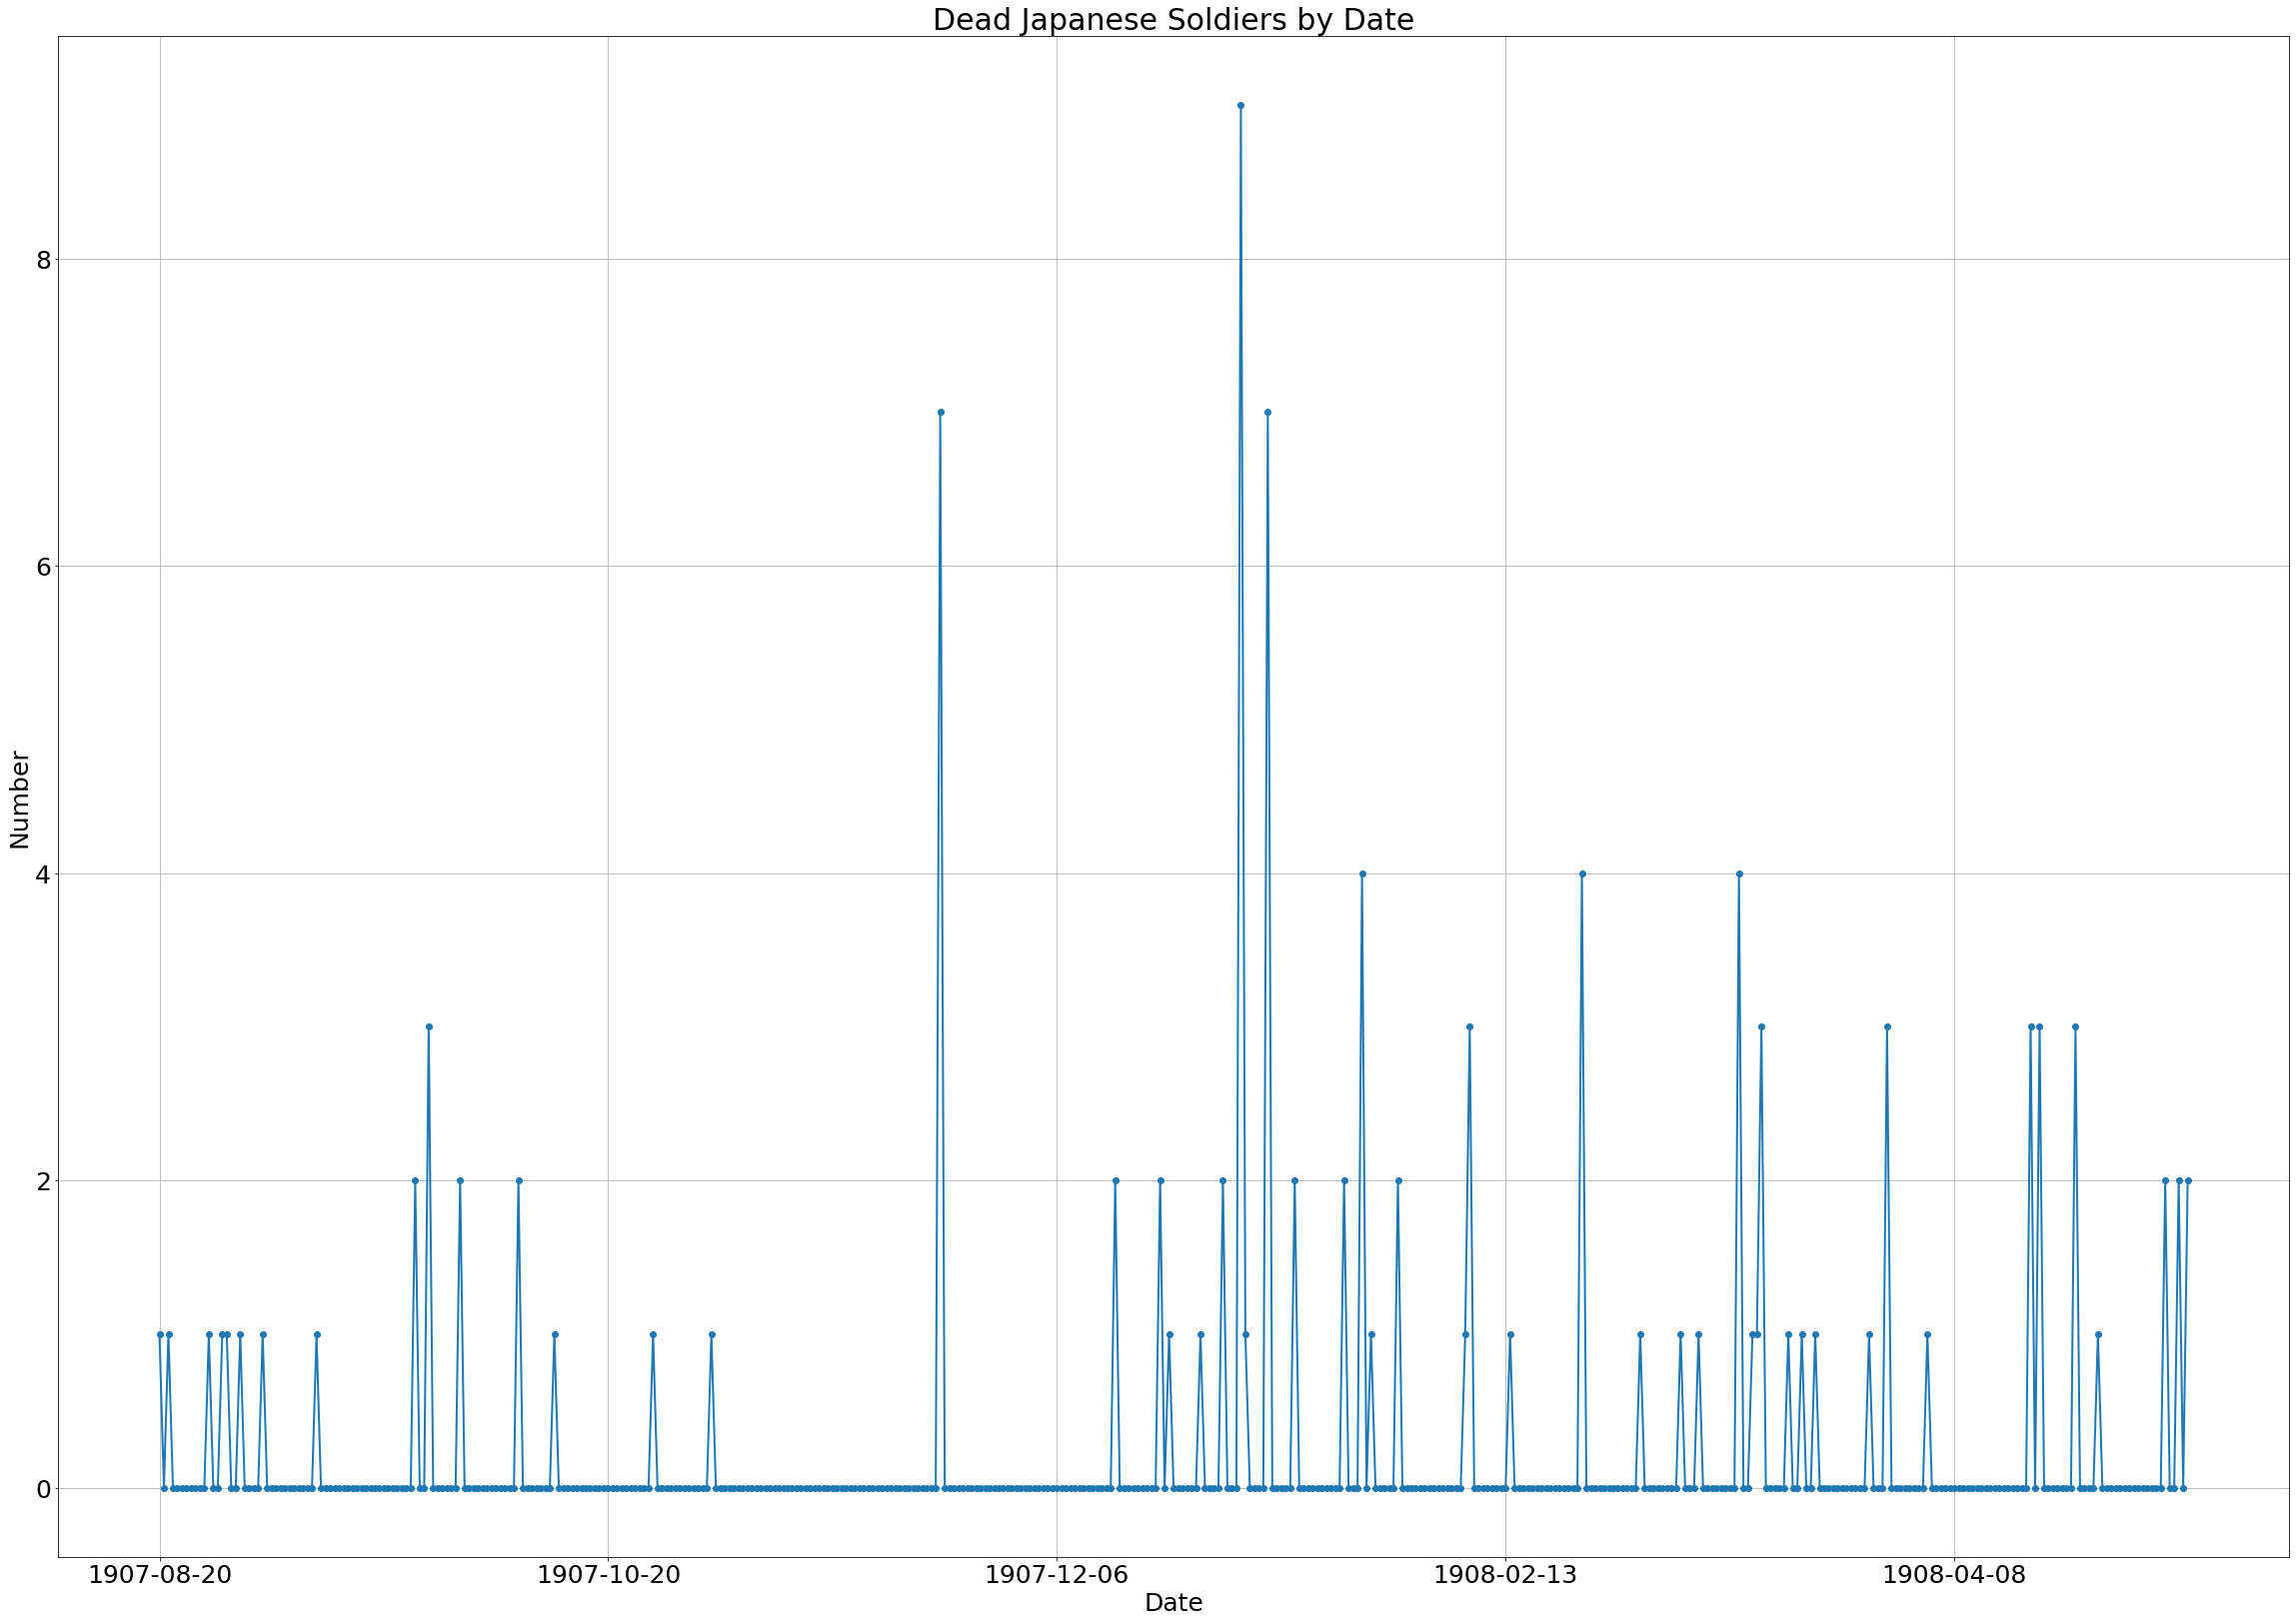

In [347]:
df_date['Dead_Japanese_soldiers'].plot(marker='o')
plt.title("Dead Japanese Soldiers by Date")
plt.xlabel("Date")
plt.ylabel("Number")
plt.show()

# Dead Chosun soldiers by Date

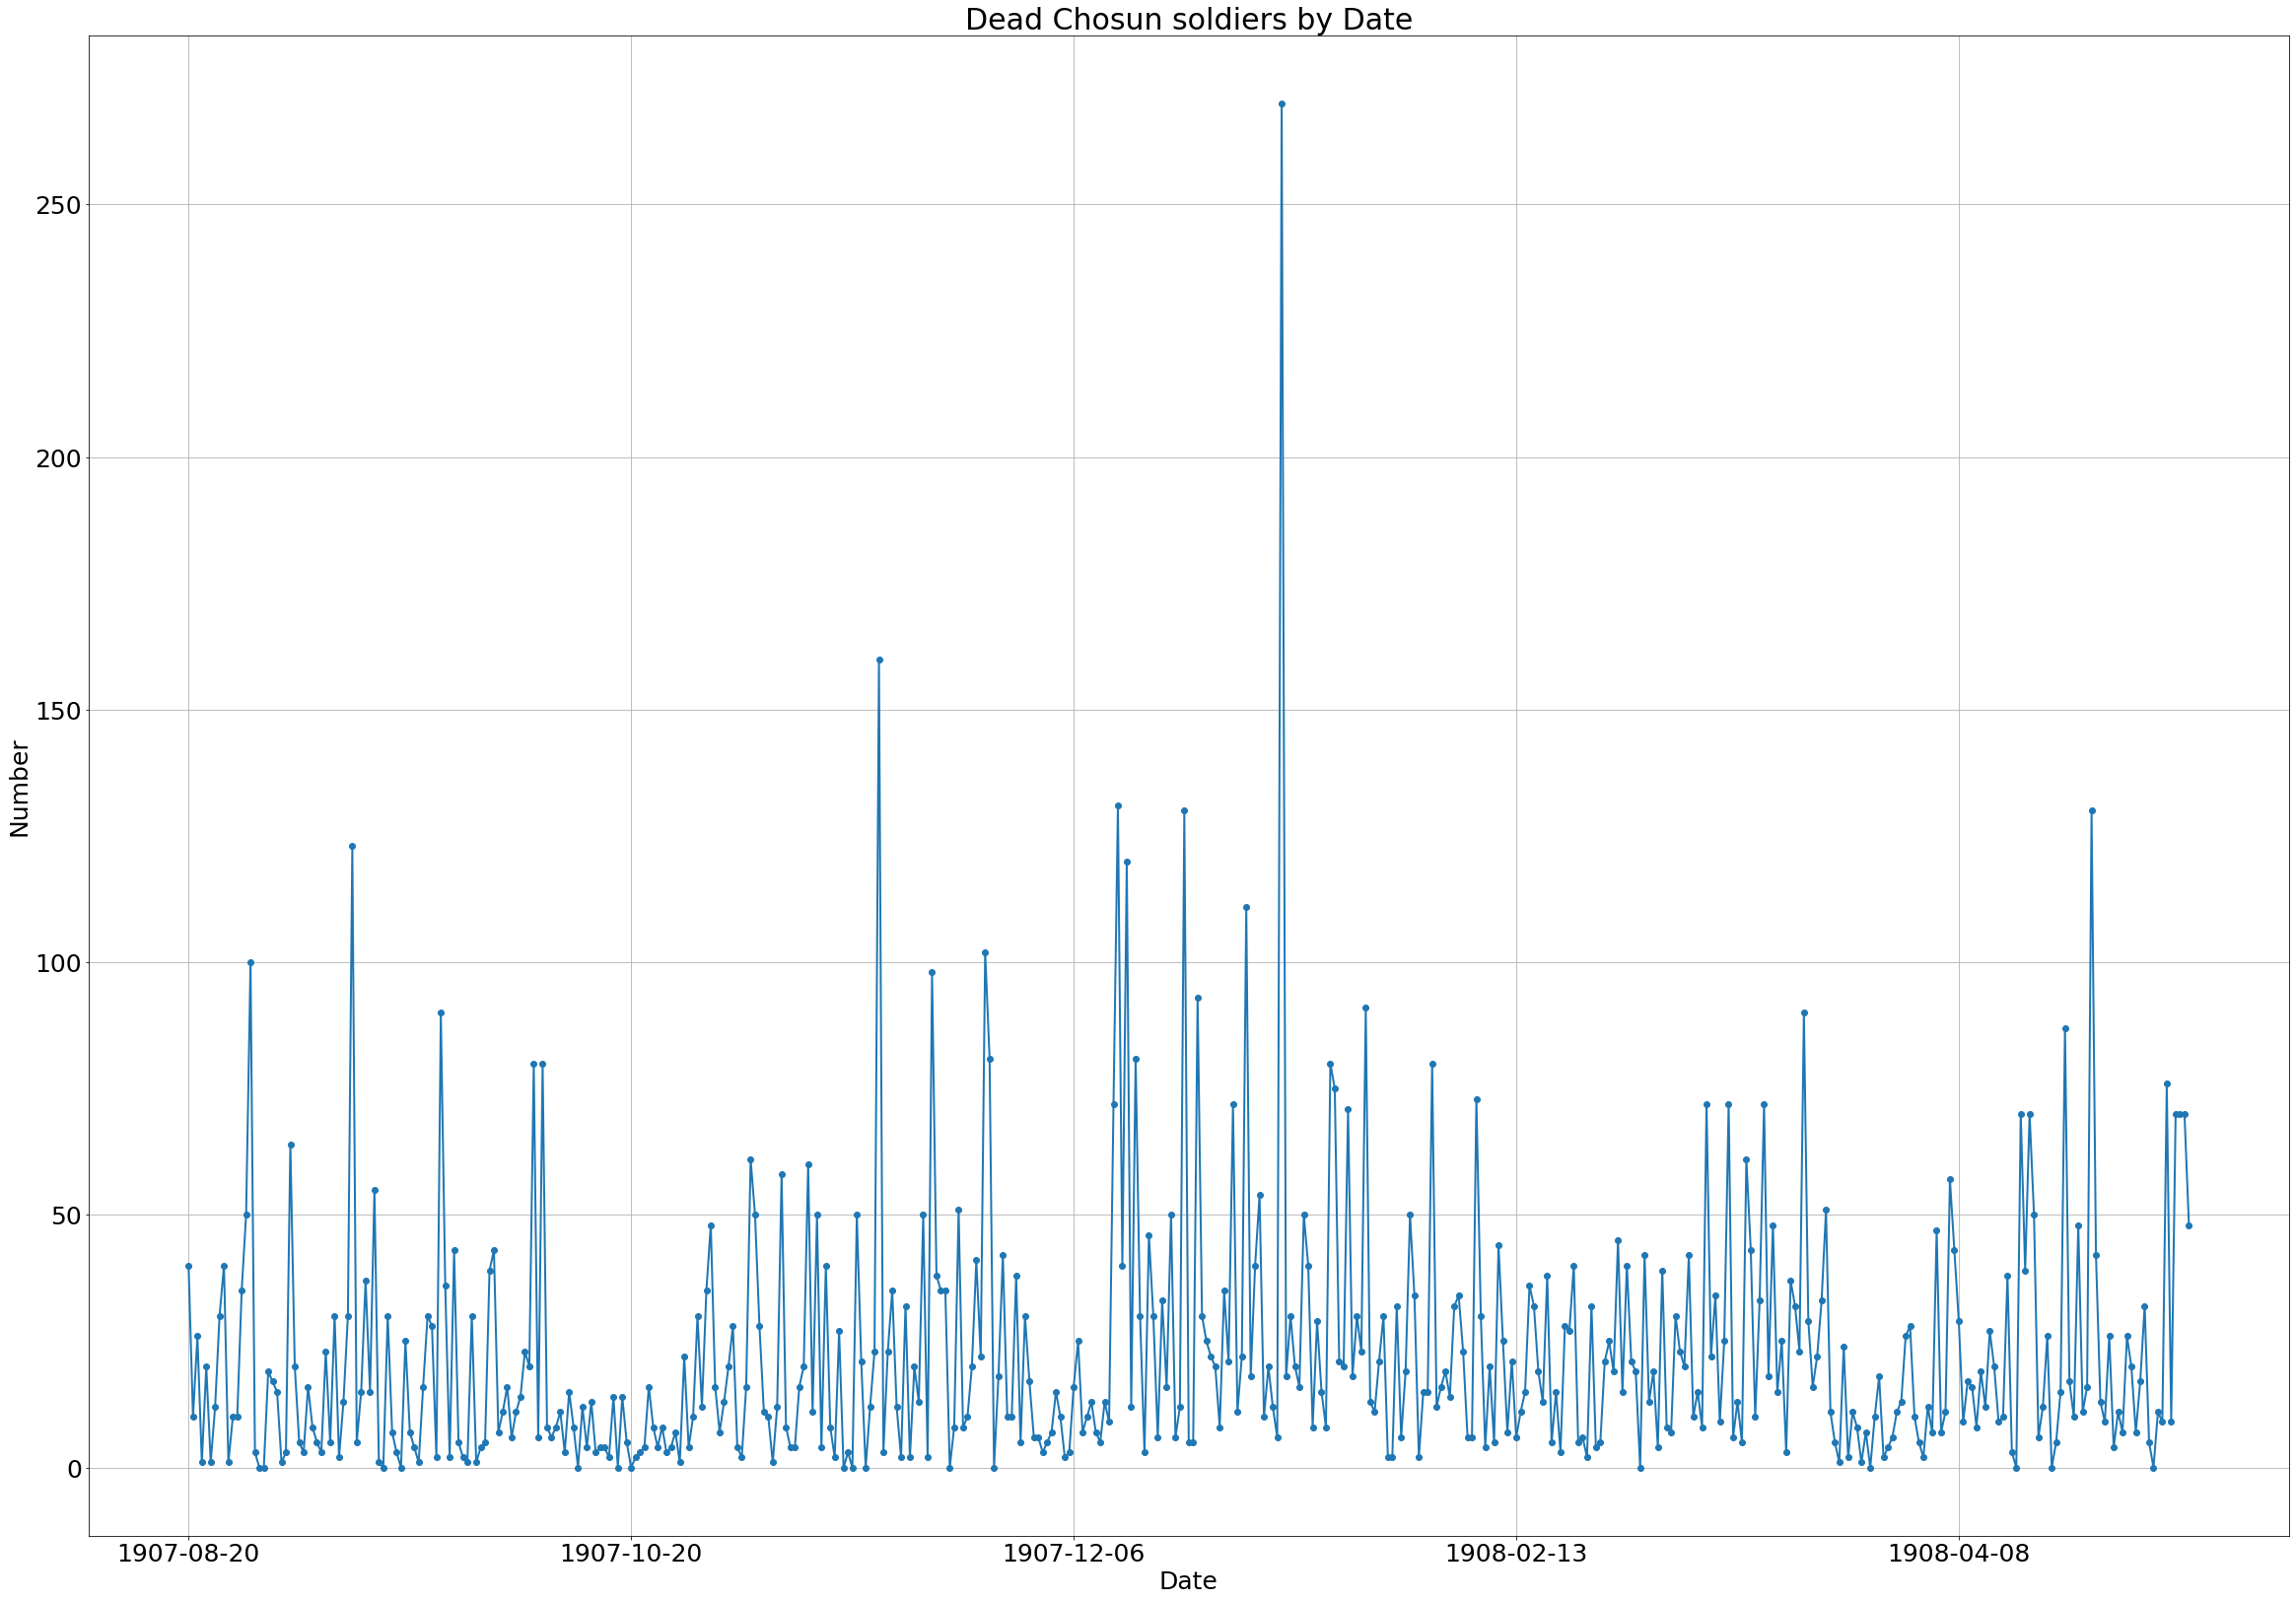

In [348]:
df_date['Dead_Chosun_soldiers'].plot(marker='o')
plt.title("Dead Chosun soldiers by Date")
plt.xlabel("Date")
plt.ylabel("Number")
plt.show()

# Chosun soldiers by Date

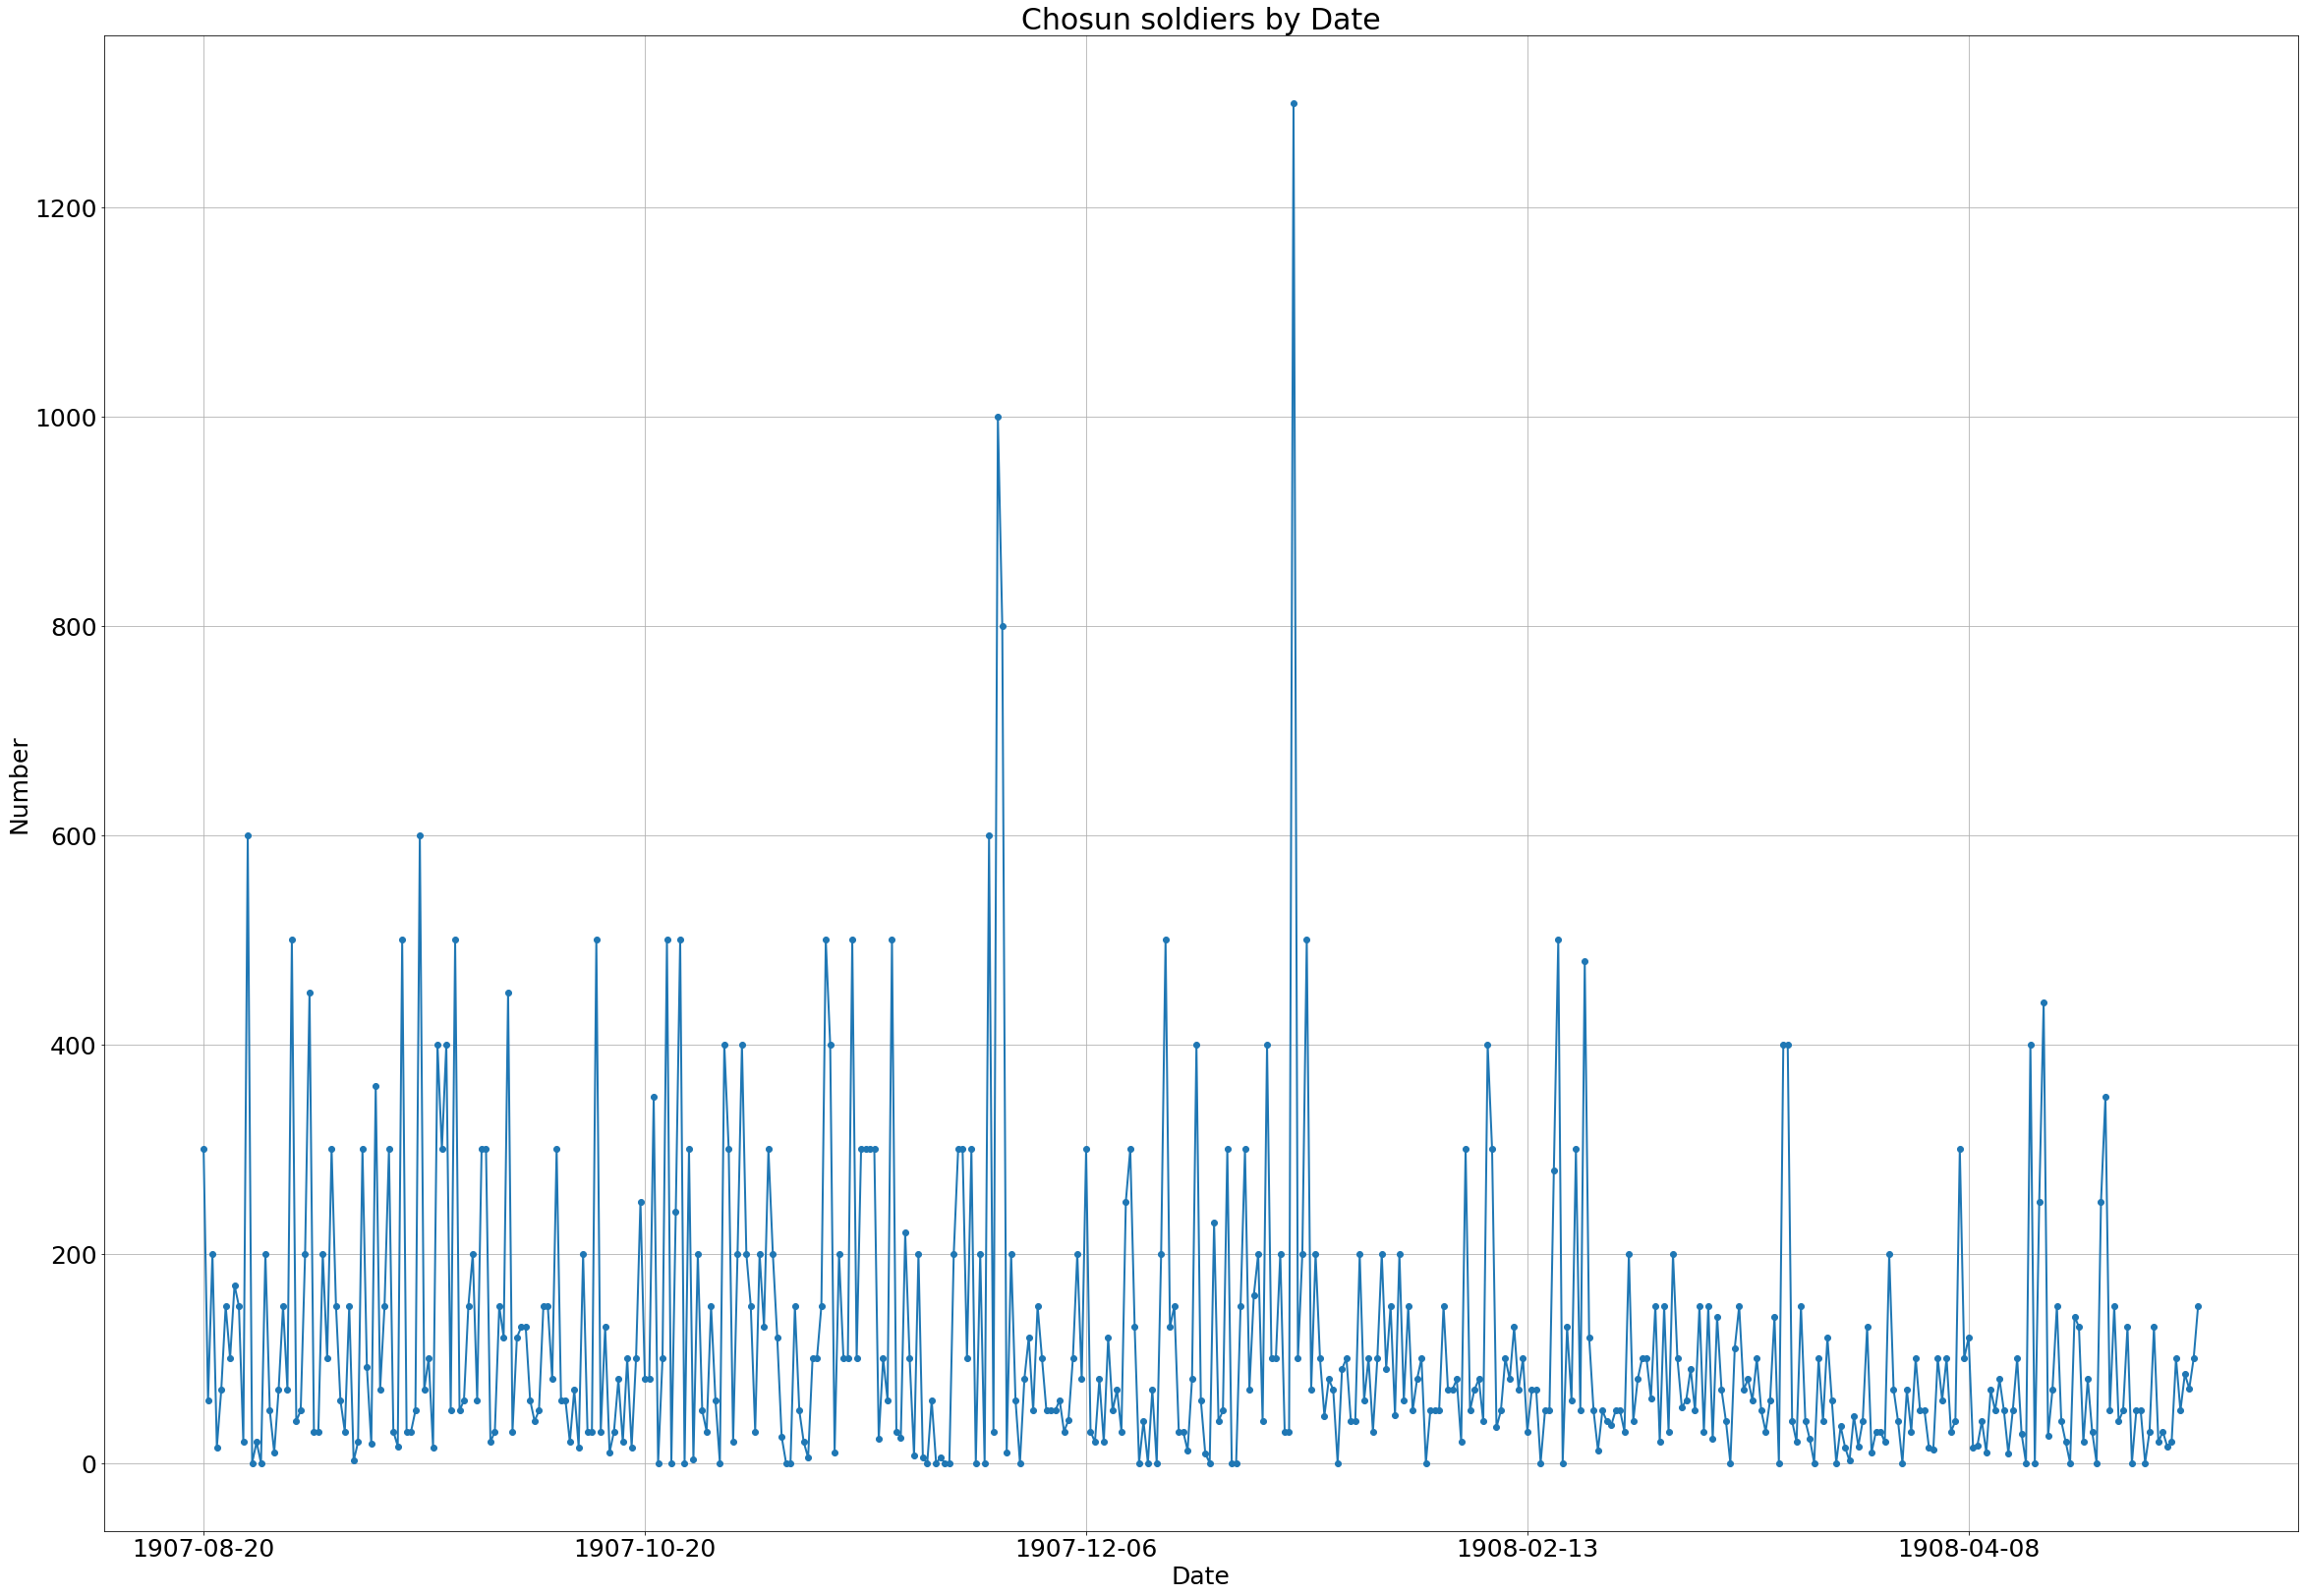

In [349]:
df_date['Chosun_soldiers'].plot(marker='o')
plt.title("Chosun soldiers by Date")
plt.xlabel("Date")
plt.ylabel("Number")
plt.show()

# Statistics by Date in Summary

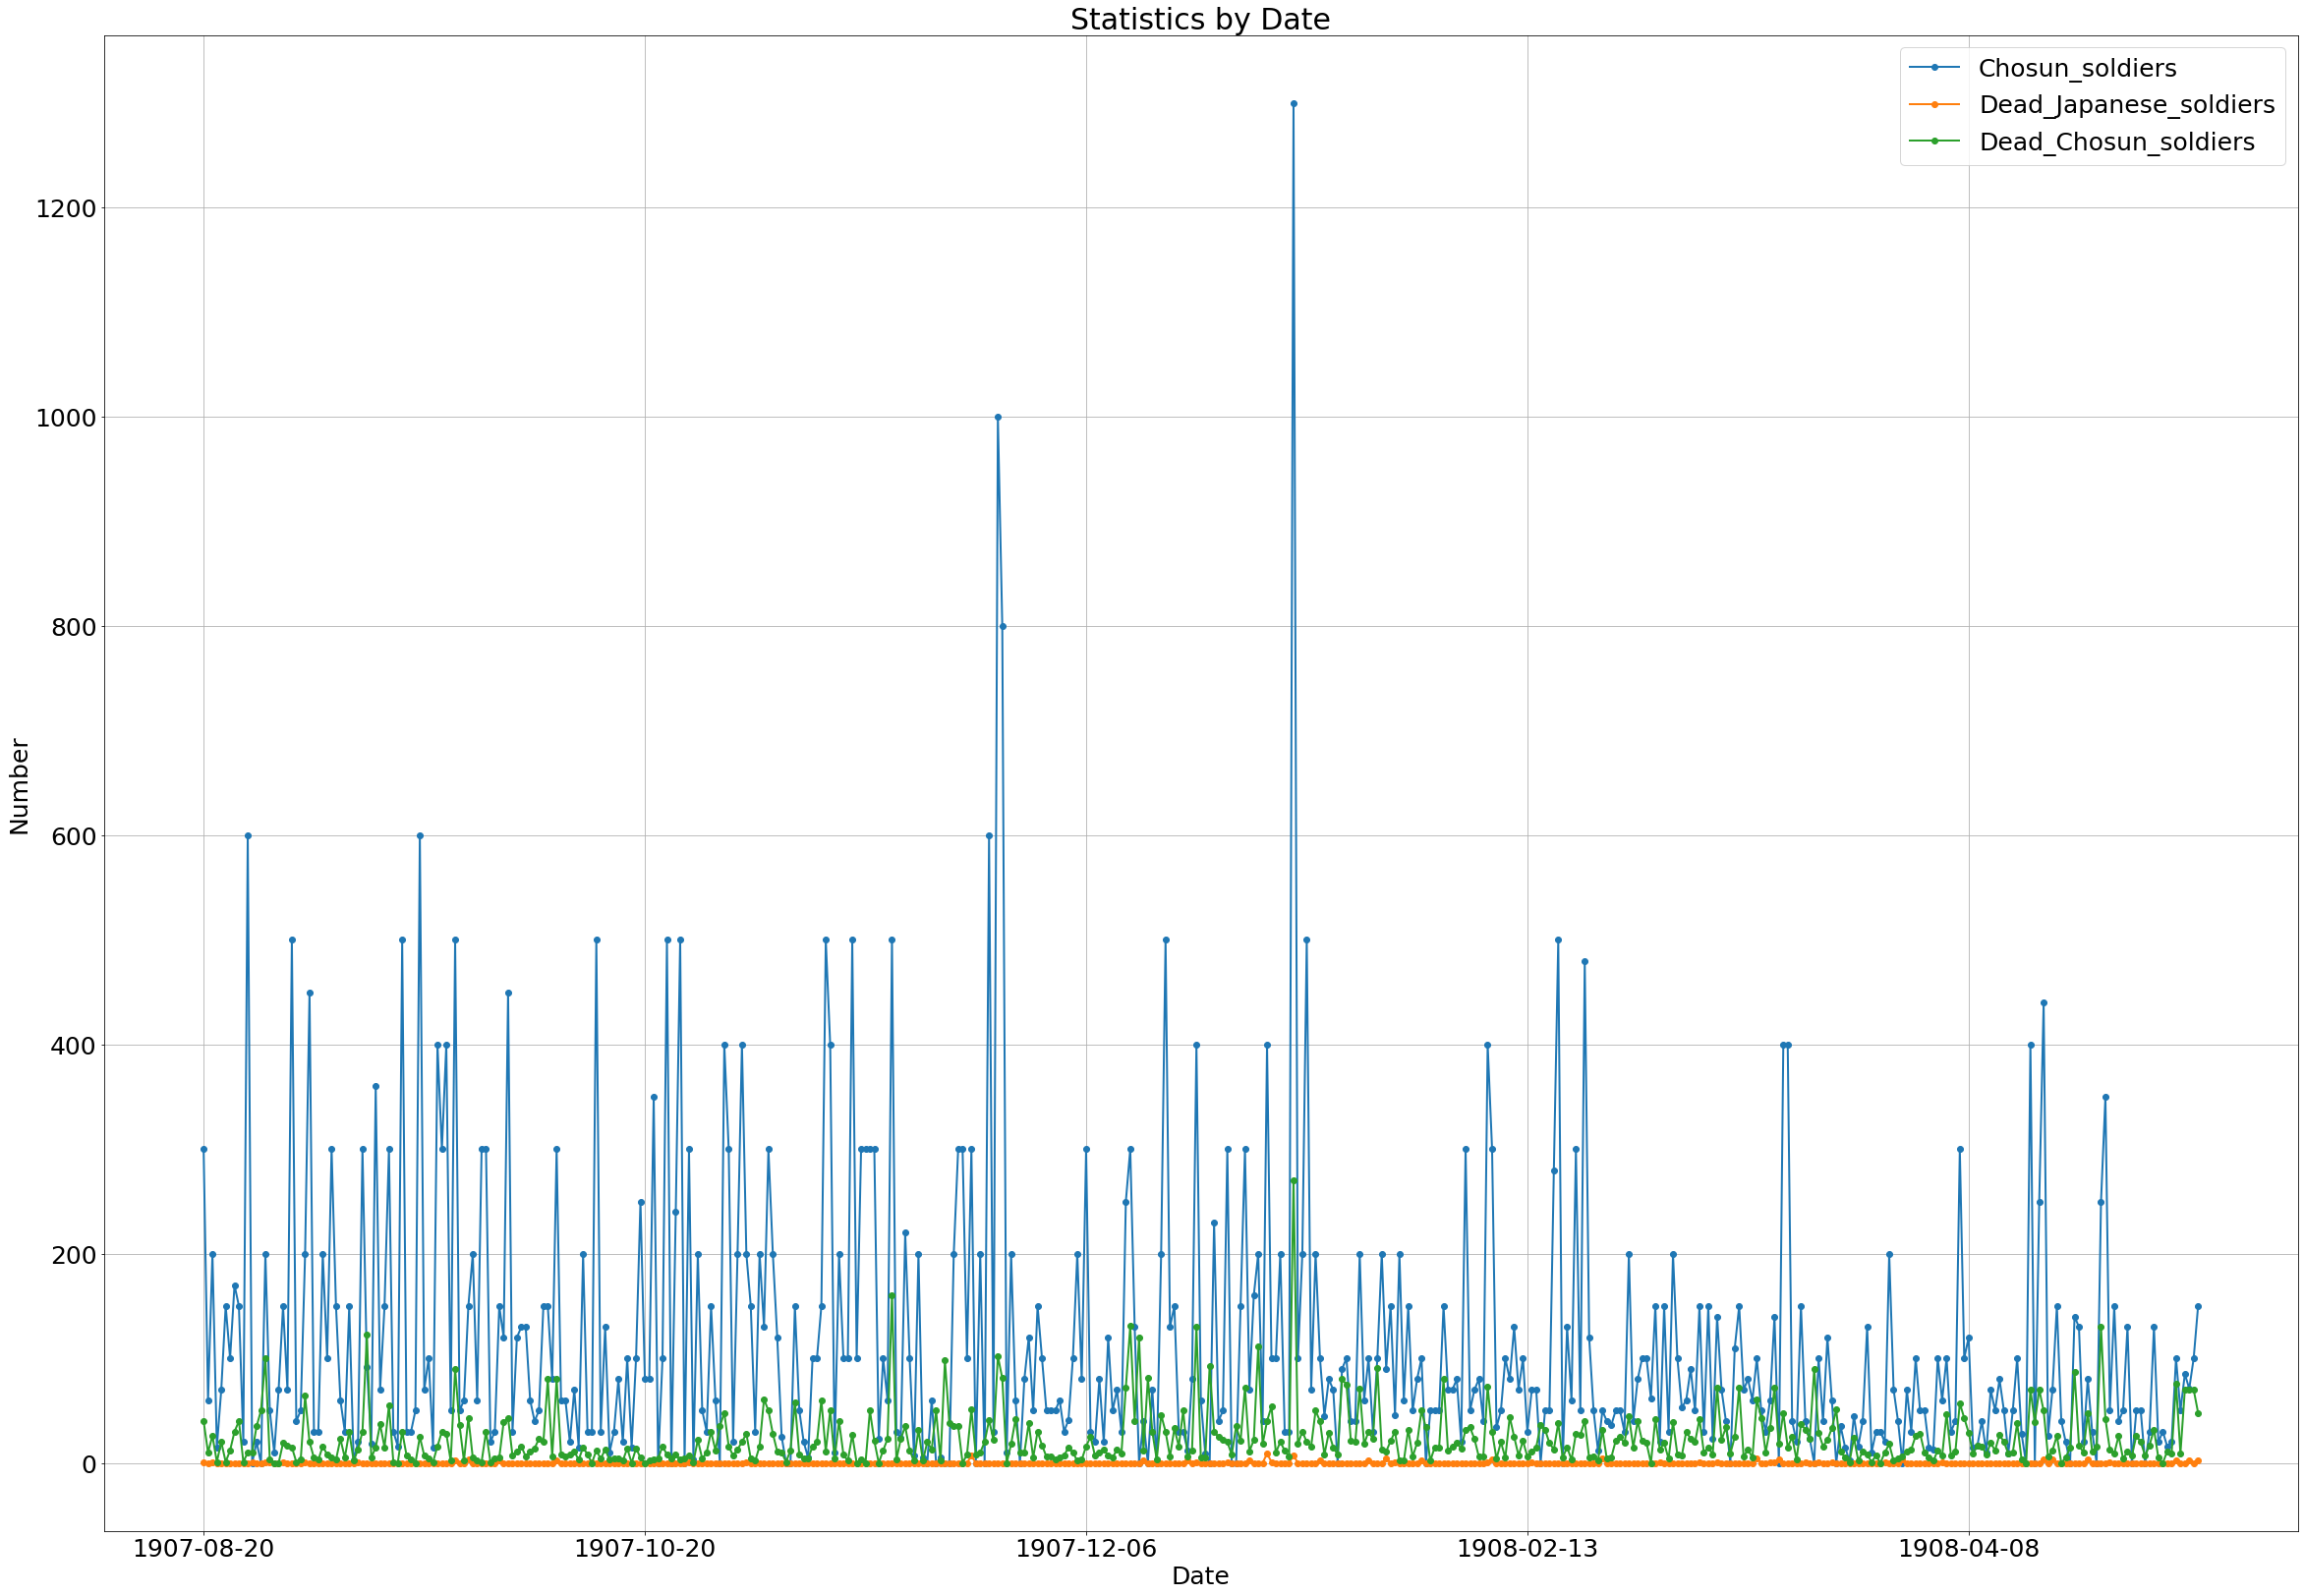

In [350]:
df_date.plot(marker='o')
plt.title("Statistics by Date")
plt.xlabel("Date")
plt.ylabel("Number")
plt.show()


In [338]:
print( df_final['Region'].value_counts())

Gangwondo           90
Gyeonggido          83
Gyeonsangbukdo      73
Chungcheongbukdo    59
Jeollabukdo         34
Hwanghaedo          32
Jeollanamdo         31
Chungcheongnamdo    22
Gyeonsangnamdo      11
Pyeongando           9
Hamgyeongdo          9
Name: Region, dtype: int64


# Combat Area(Where did they fight?)

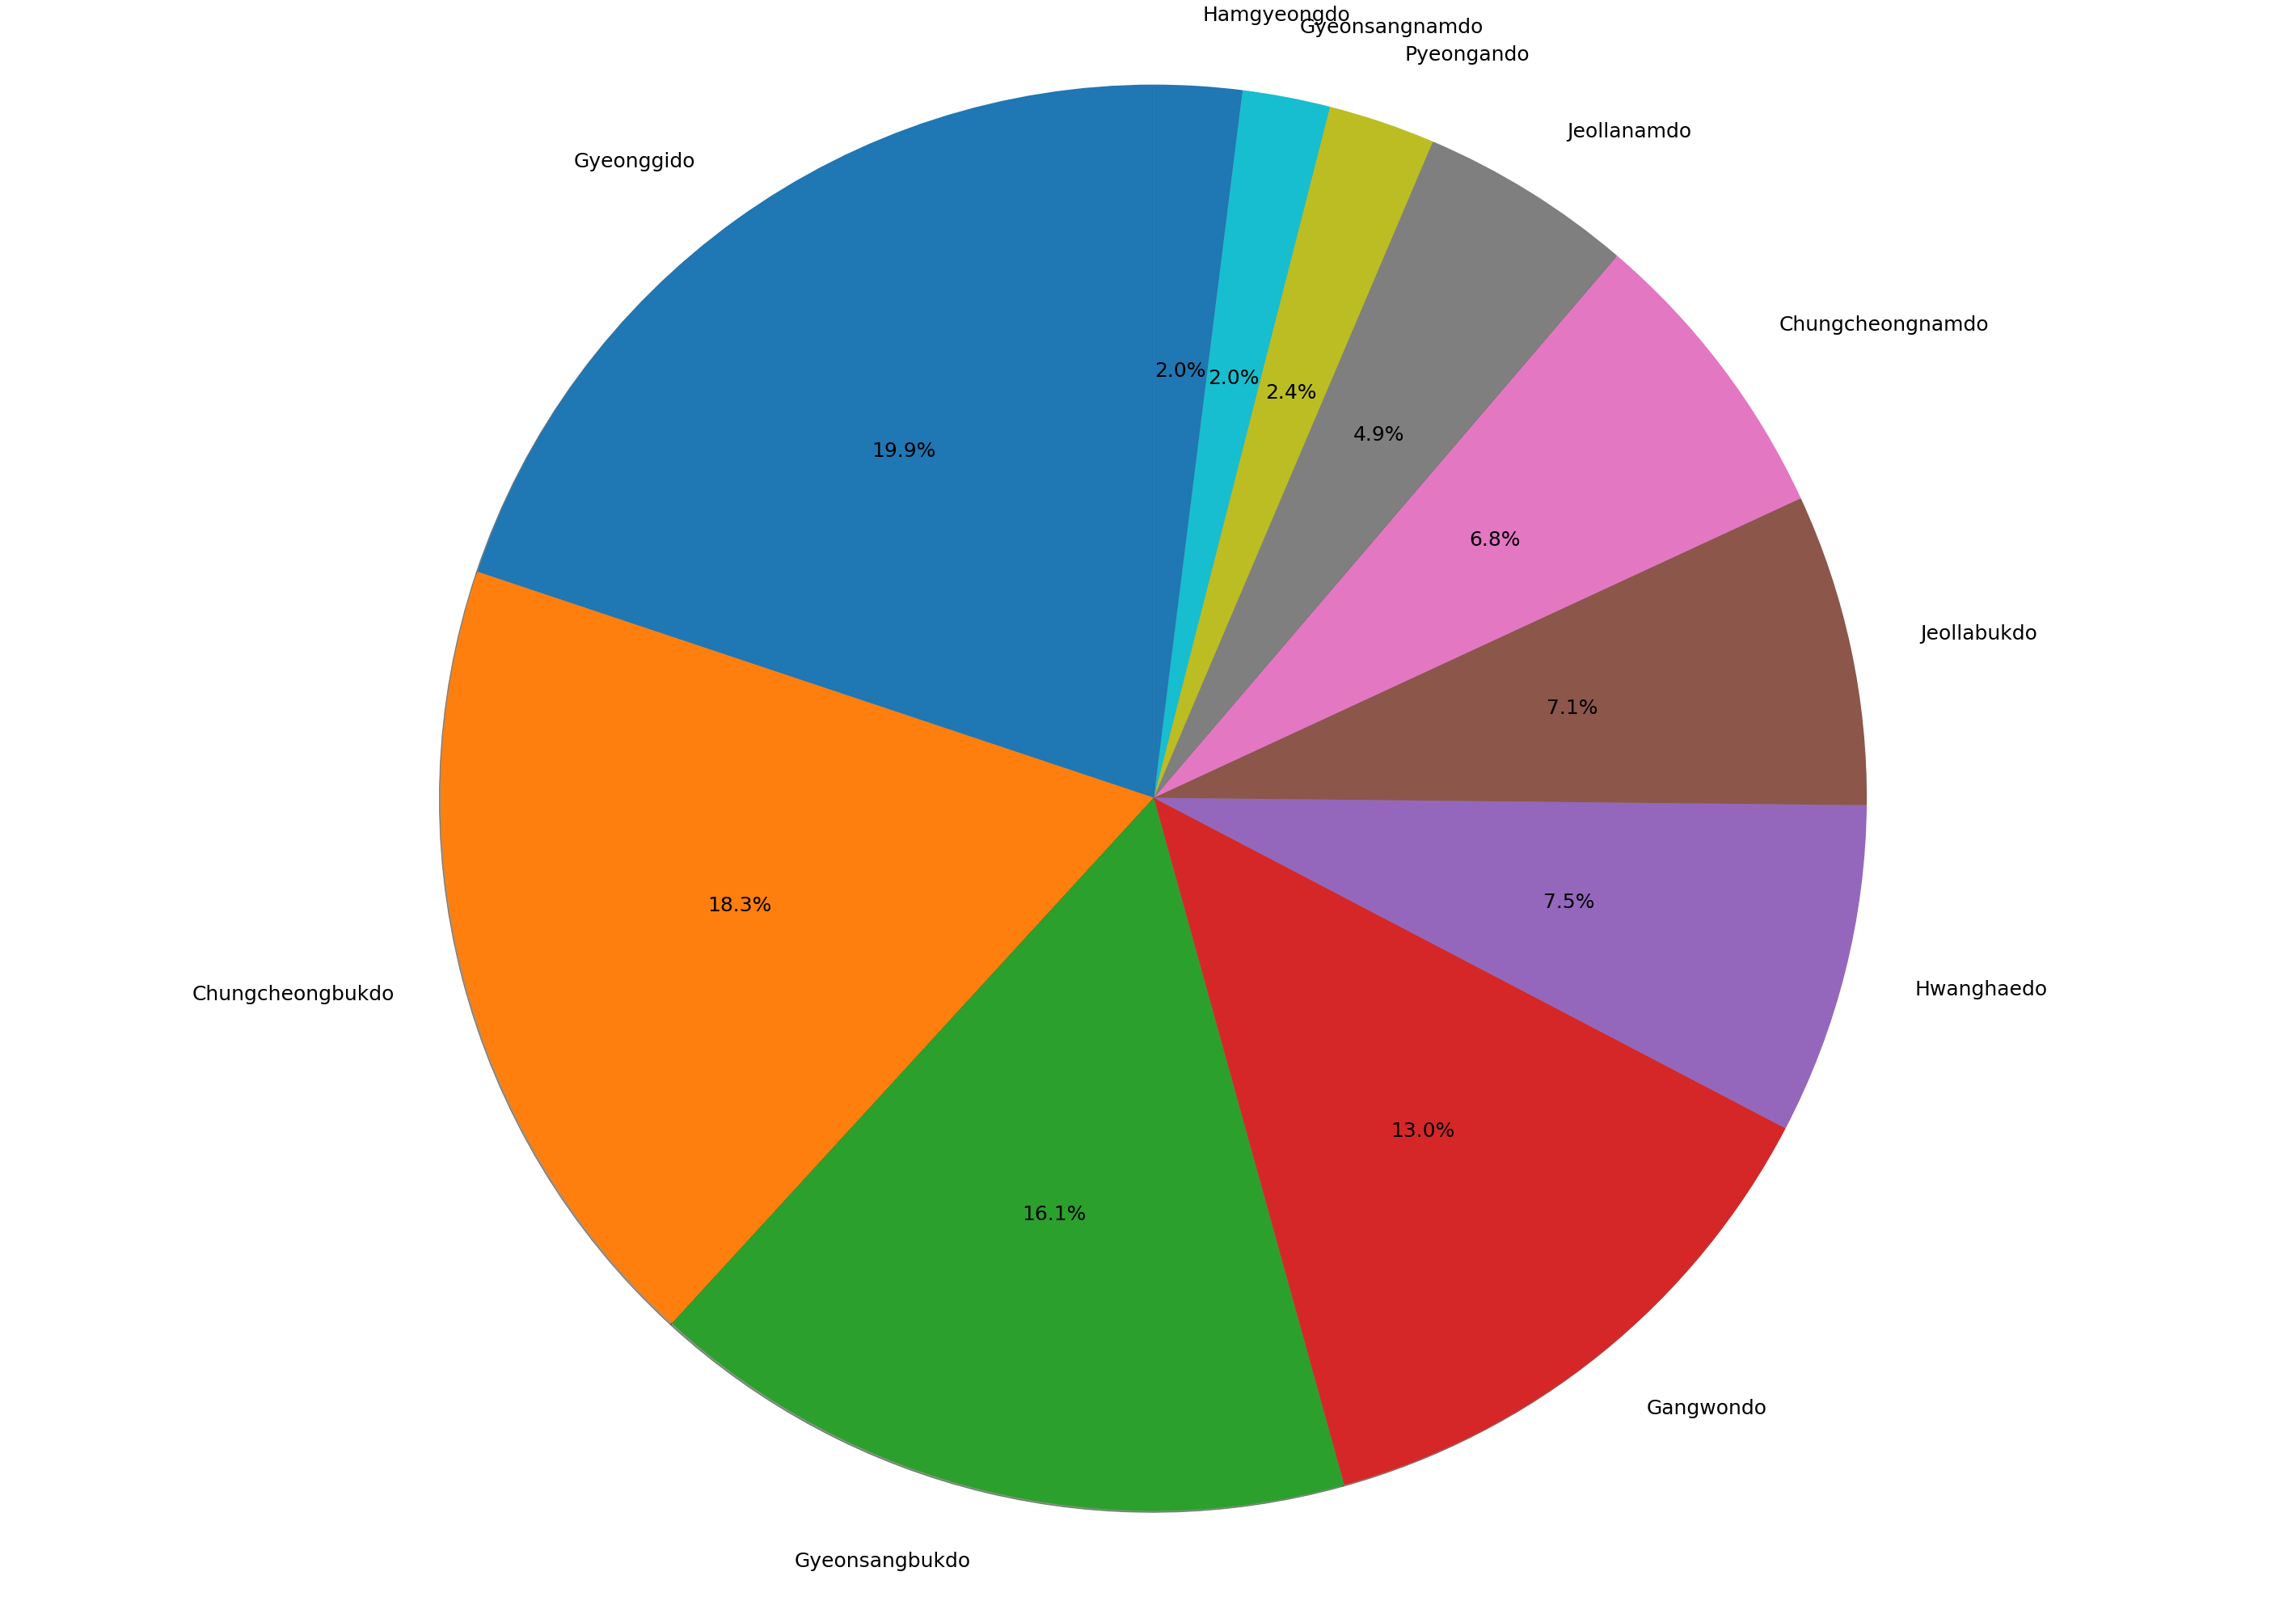

In [339]:
sizes = df_final['Region'].value_counts()
labels = ['Gyeonggido', 'Gangwondo','Gyeonsangbukdo','Chungcheongbukdo','Jeollabukdo','Hwanghaedo', 'Jeollanamdo', 'Chungcheongnamdo', 'Gyeonsangnamdo','Pyeongando', 'Hamgyeongdo']
plt.pie(sizes,labels = df_final['Region'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, radius = 10)
plt.axis('equal')

plt.tight_layout()
plt.show()

In [340]:
print(list(df_final['Region'].unique()))

['Gyeonggido', 'Chungcheongbukdo', 'Gyeonsangbukdo', 'Gangwondo', 'Hwanghaedo', 'Jeollabukdo', 'Chungcheongnamdo', 'Jeollanamdo', 'Pyeongando', 'Gyeonsangnamdo', 'Hamgyeongdo']


# 지역별 의병수/의병사망/일본군사망 요약 통계

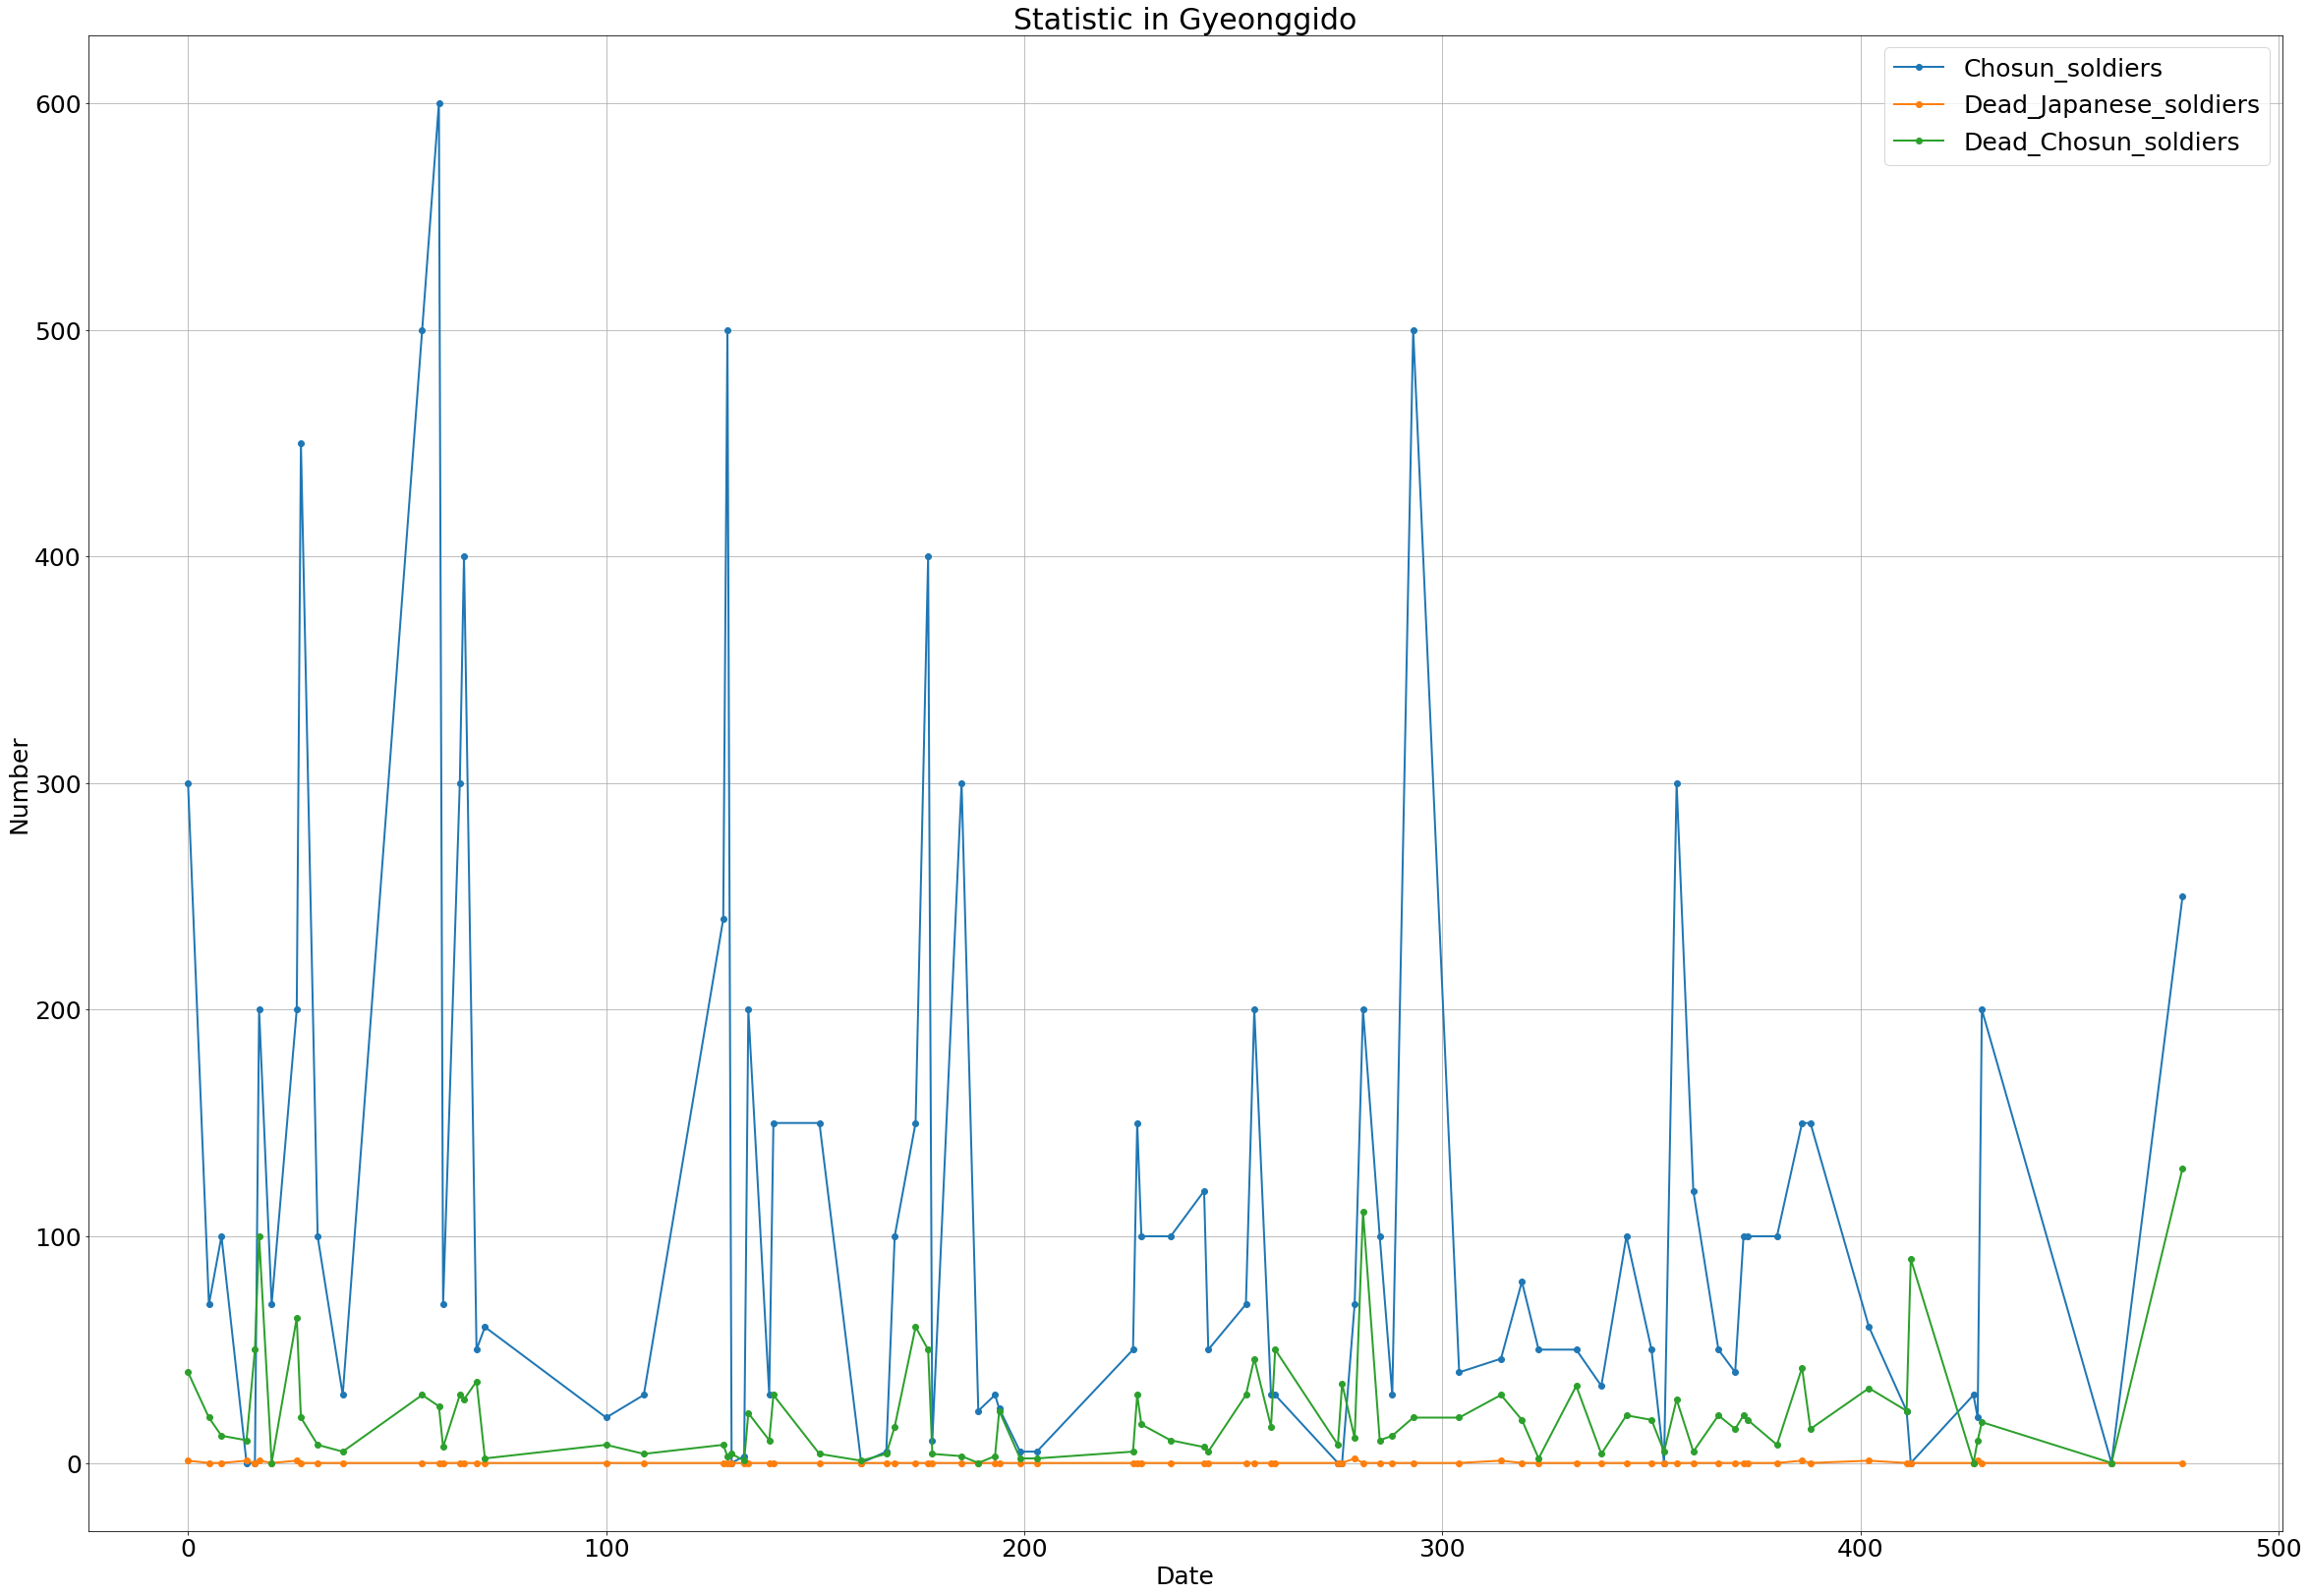

In [351]:
Gyeonggido = df_final[df_final['Region'].str.contains("Gyeonggido")]
Gyeonggido.plot(marker='o')
plt.title("Statistic in Gyeonggido")
plt.xlabel("Date")
plt.ylabel("Number")
plt.show()

이렇게 셀 하나당 그래프 하나씩 넣고 싶으면, 셀마다 변수값을 list(df_final['Region'].unique())에 있는 값들로 하나씩 지정해서 실행하면 됨.

근데 난 귀찮아서 걍 for문으로 만들었는데 보기 좀 번거로울 수도 있음.

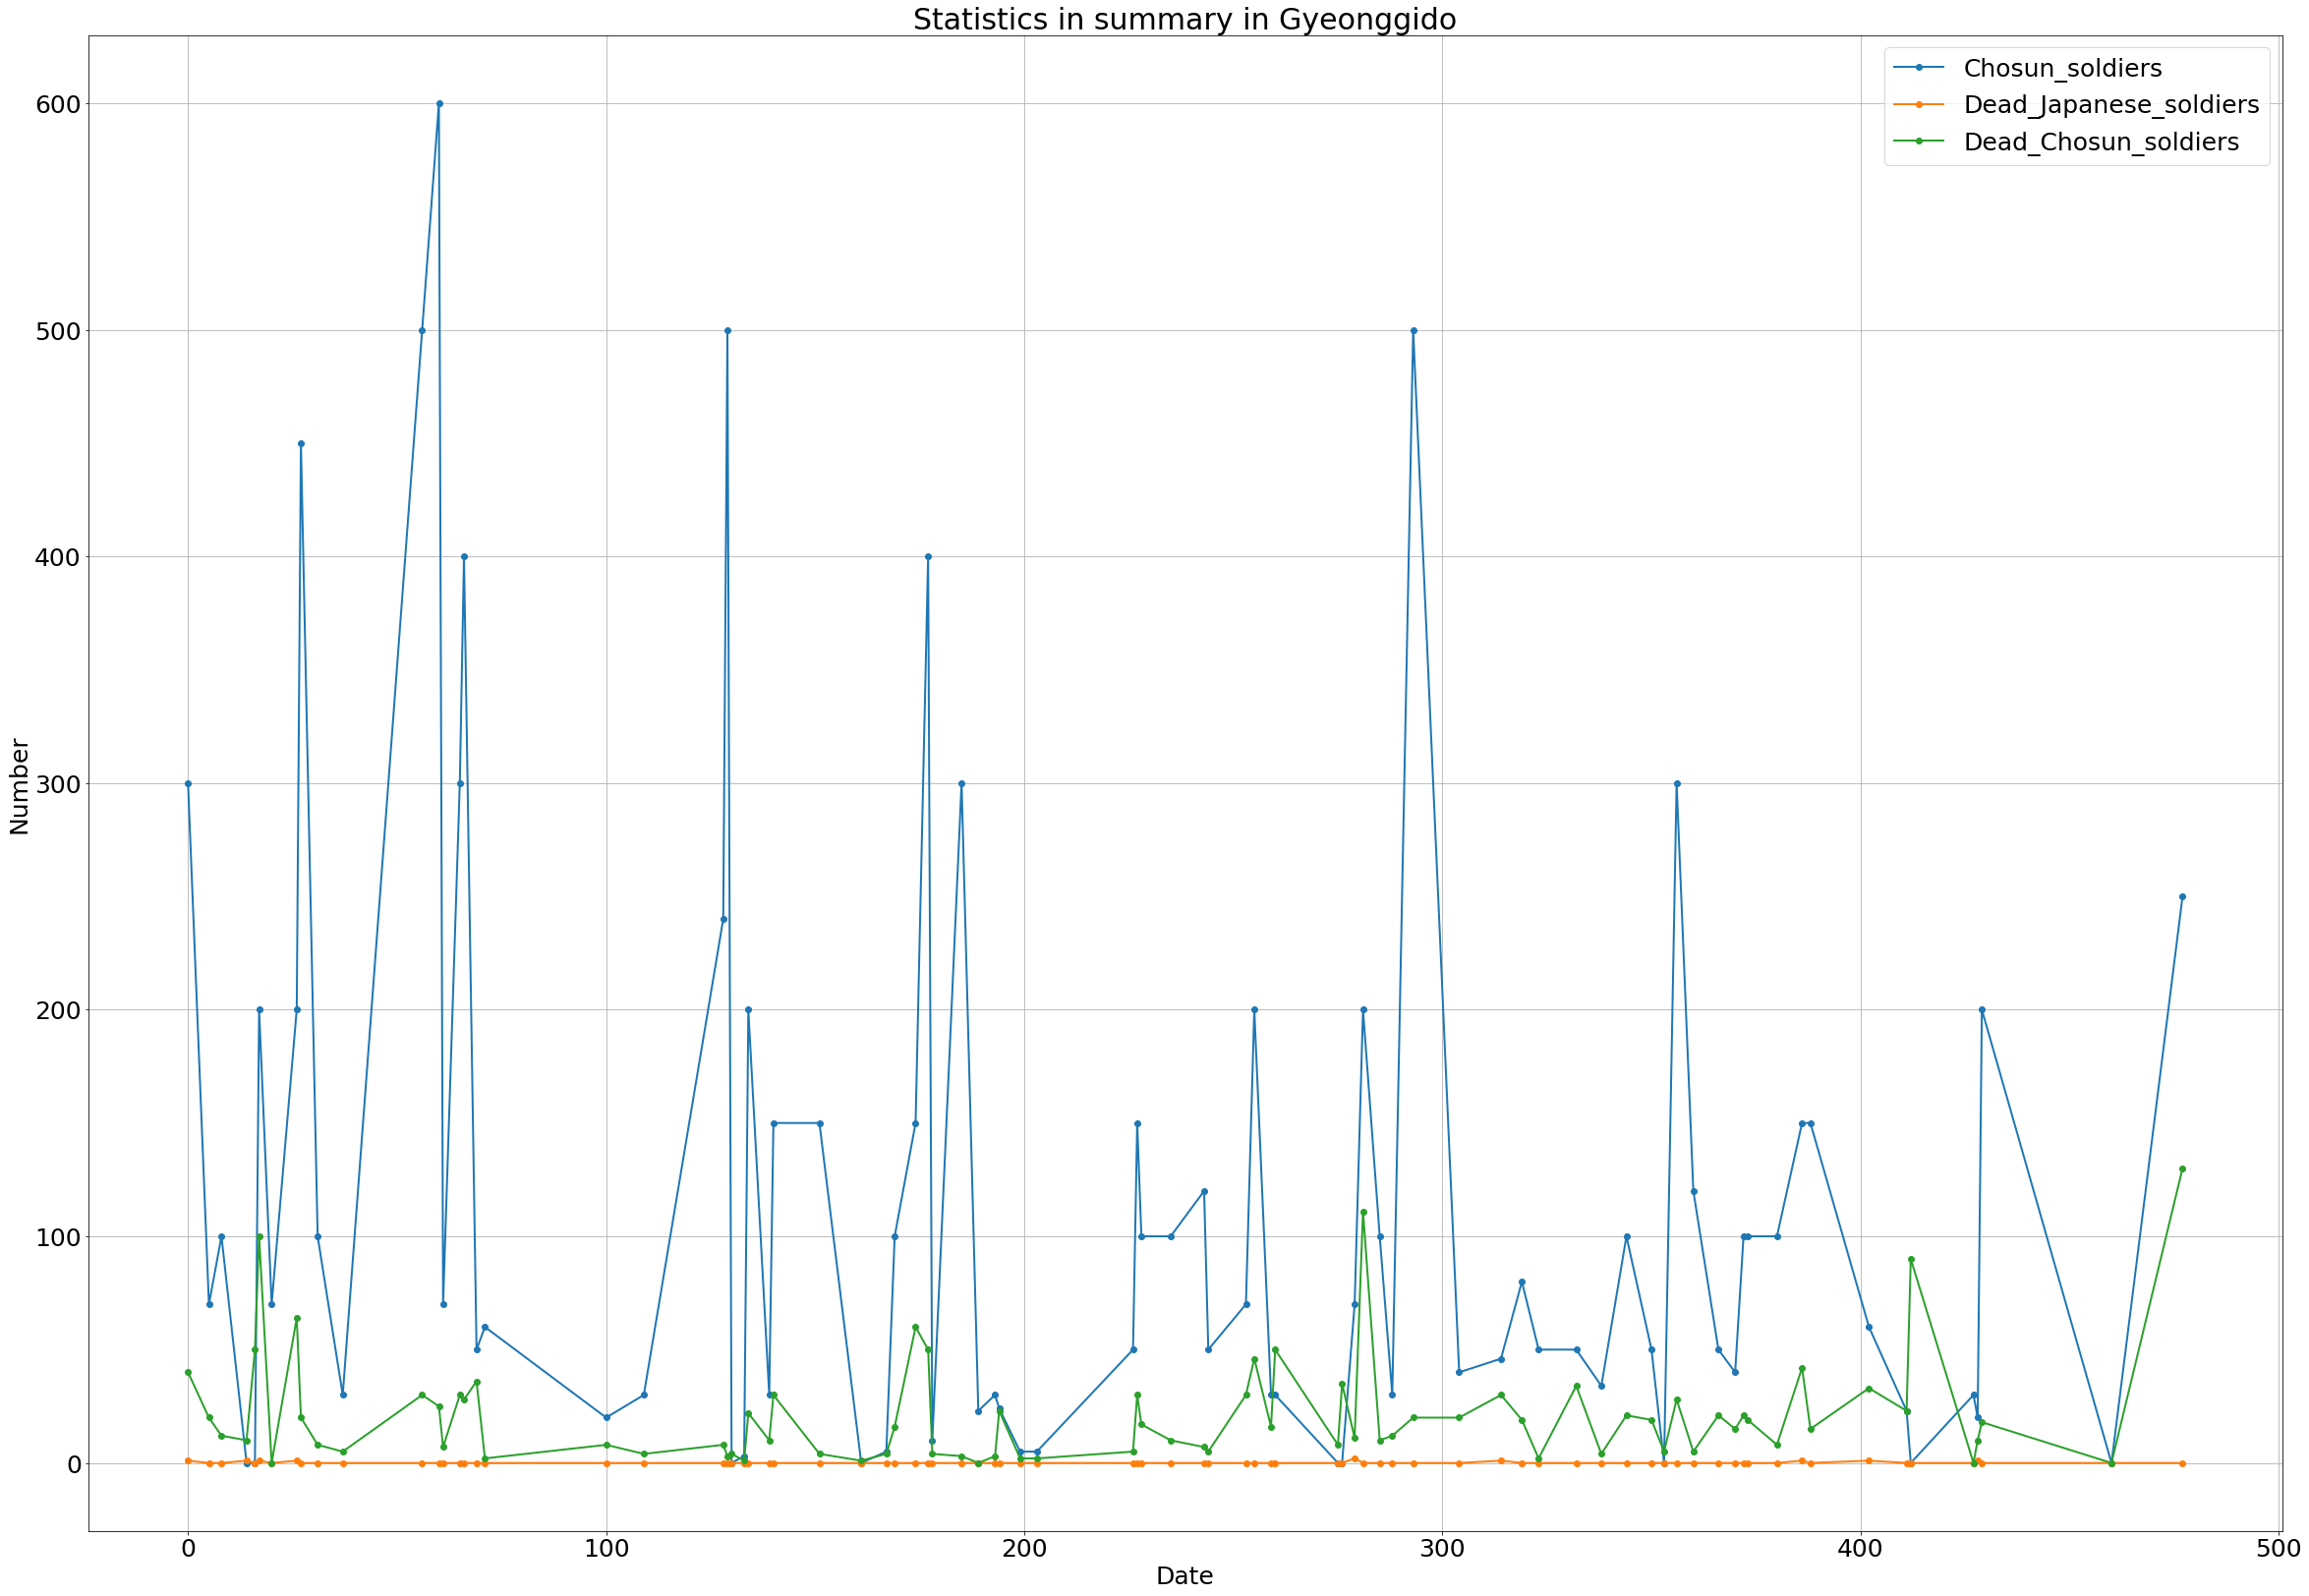

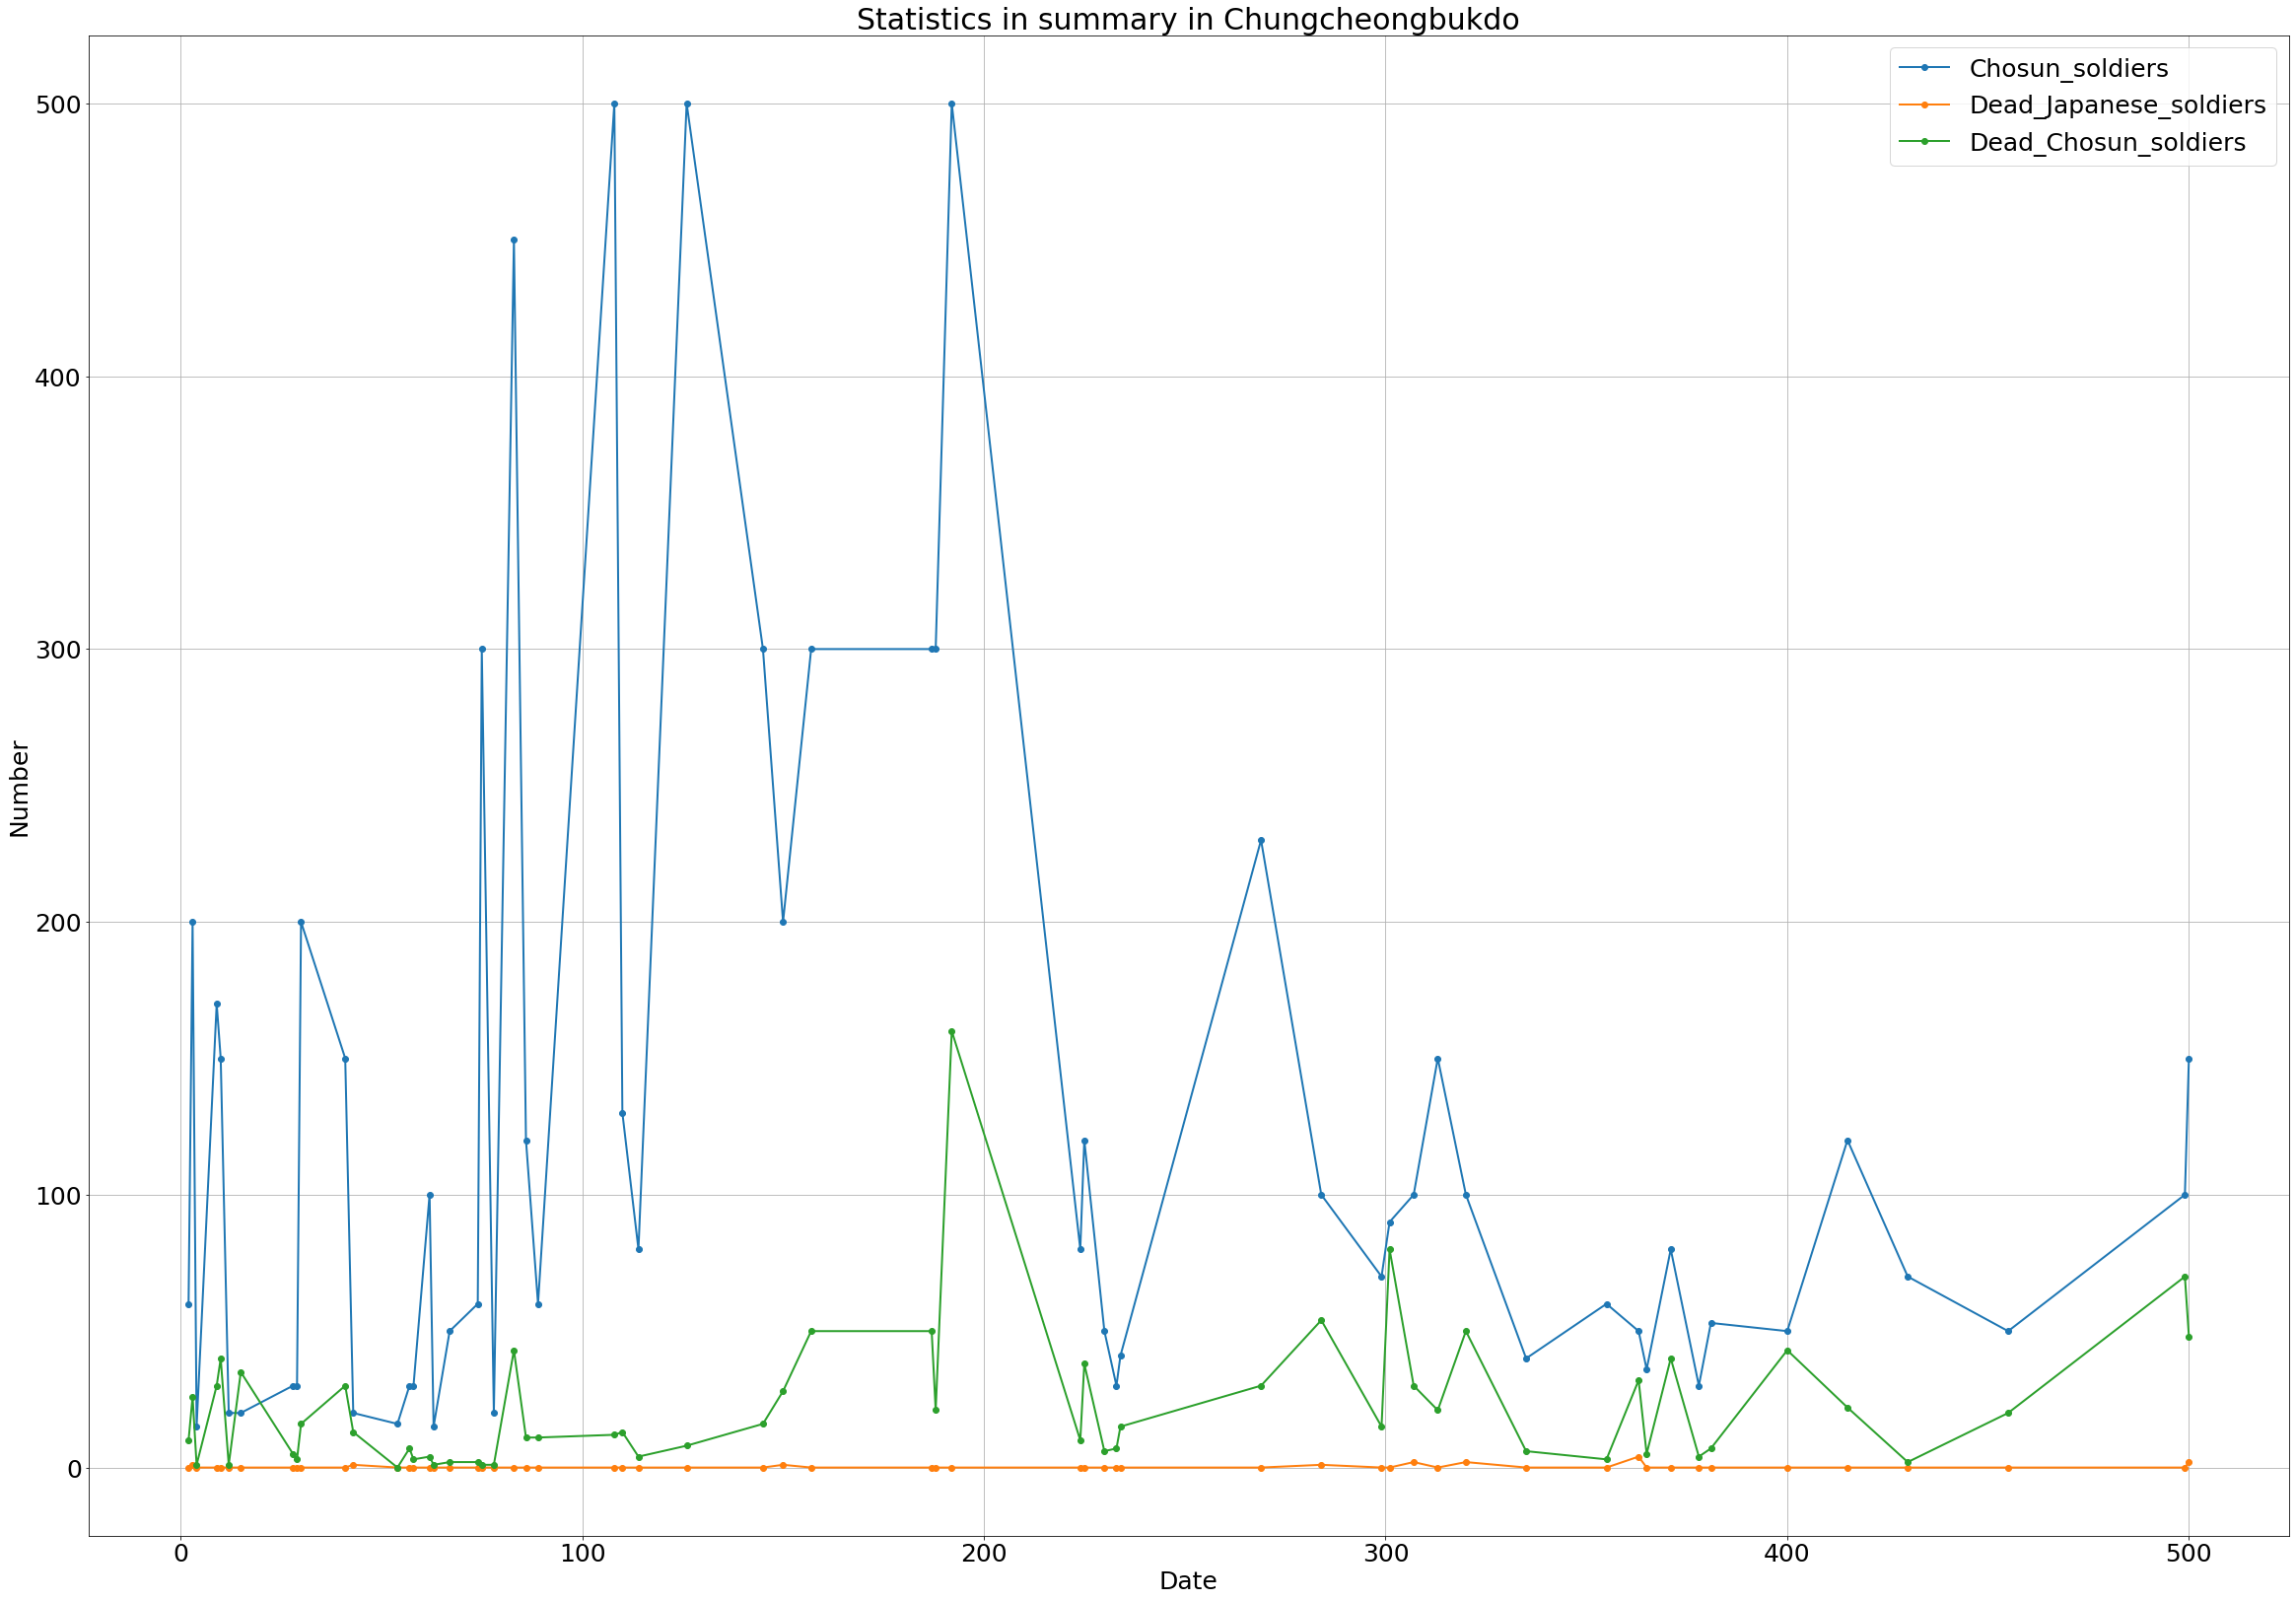

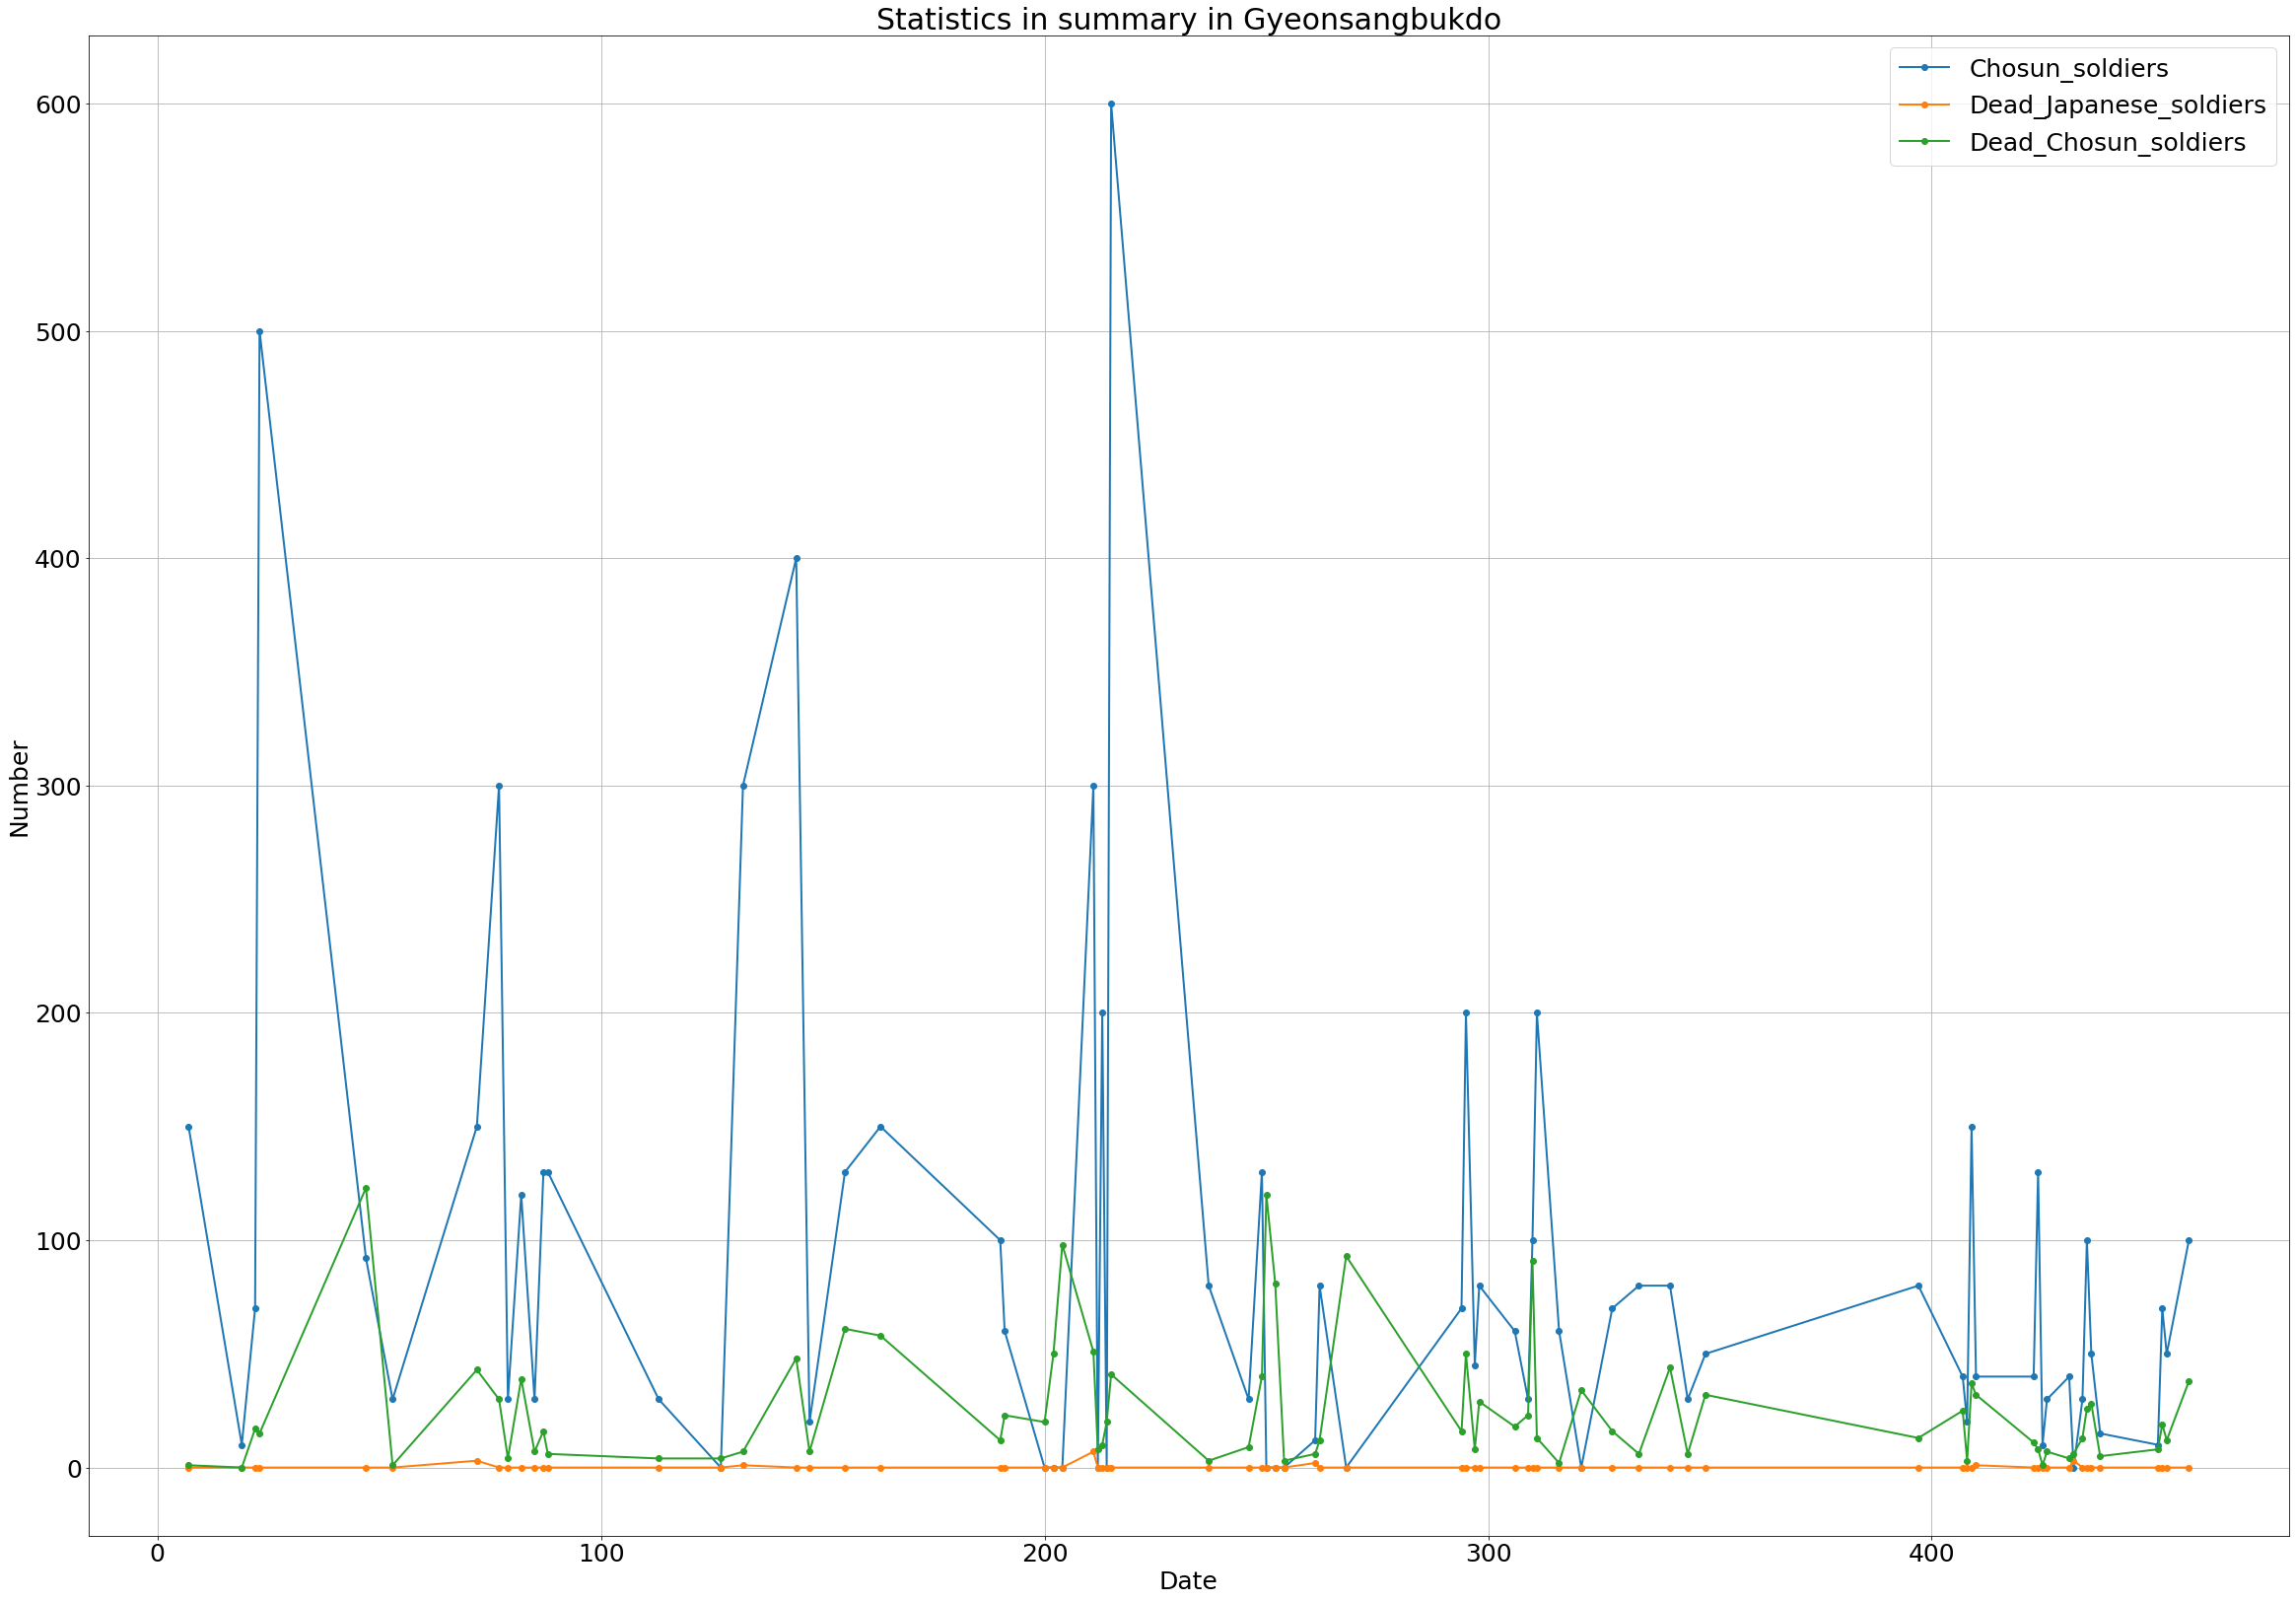

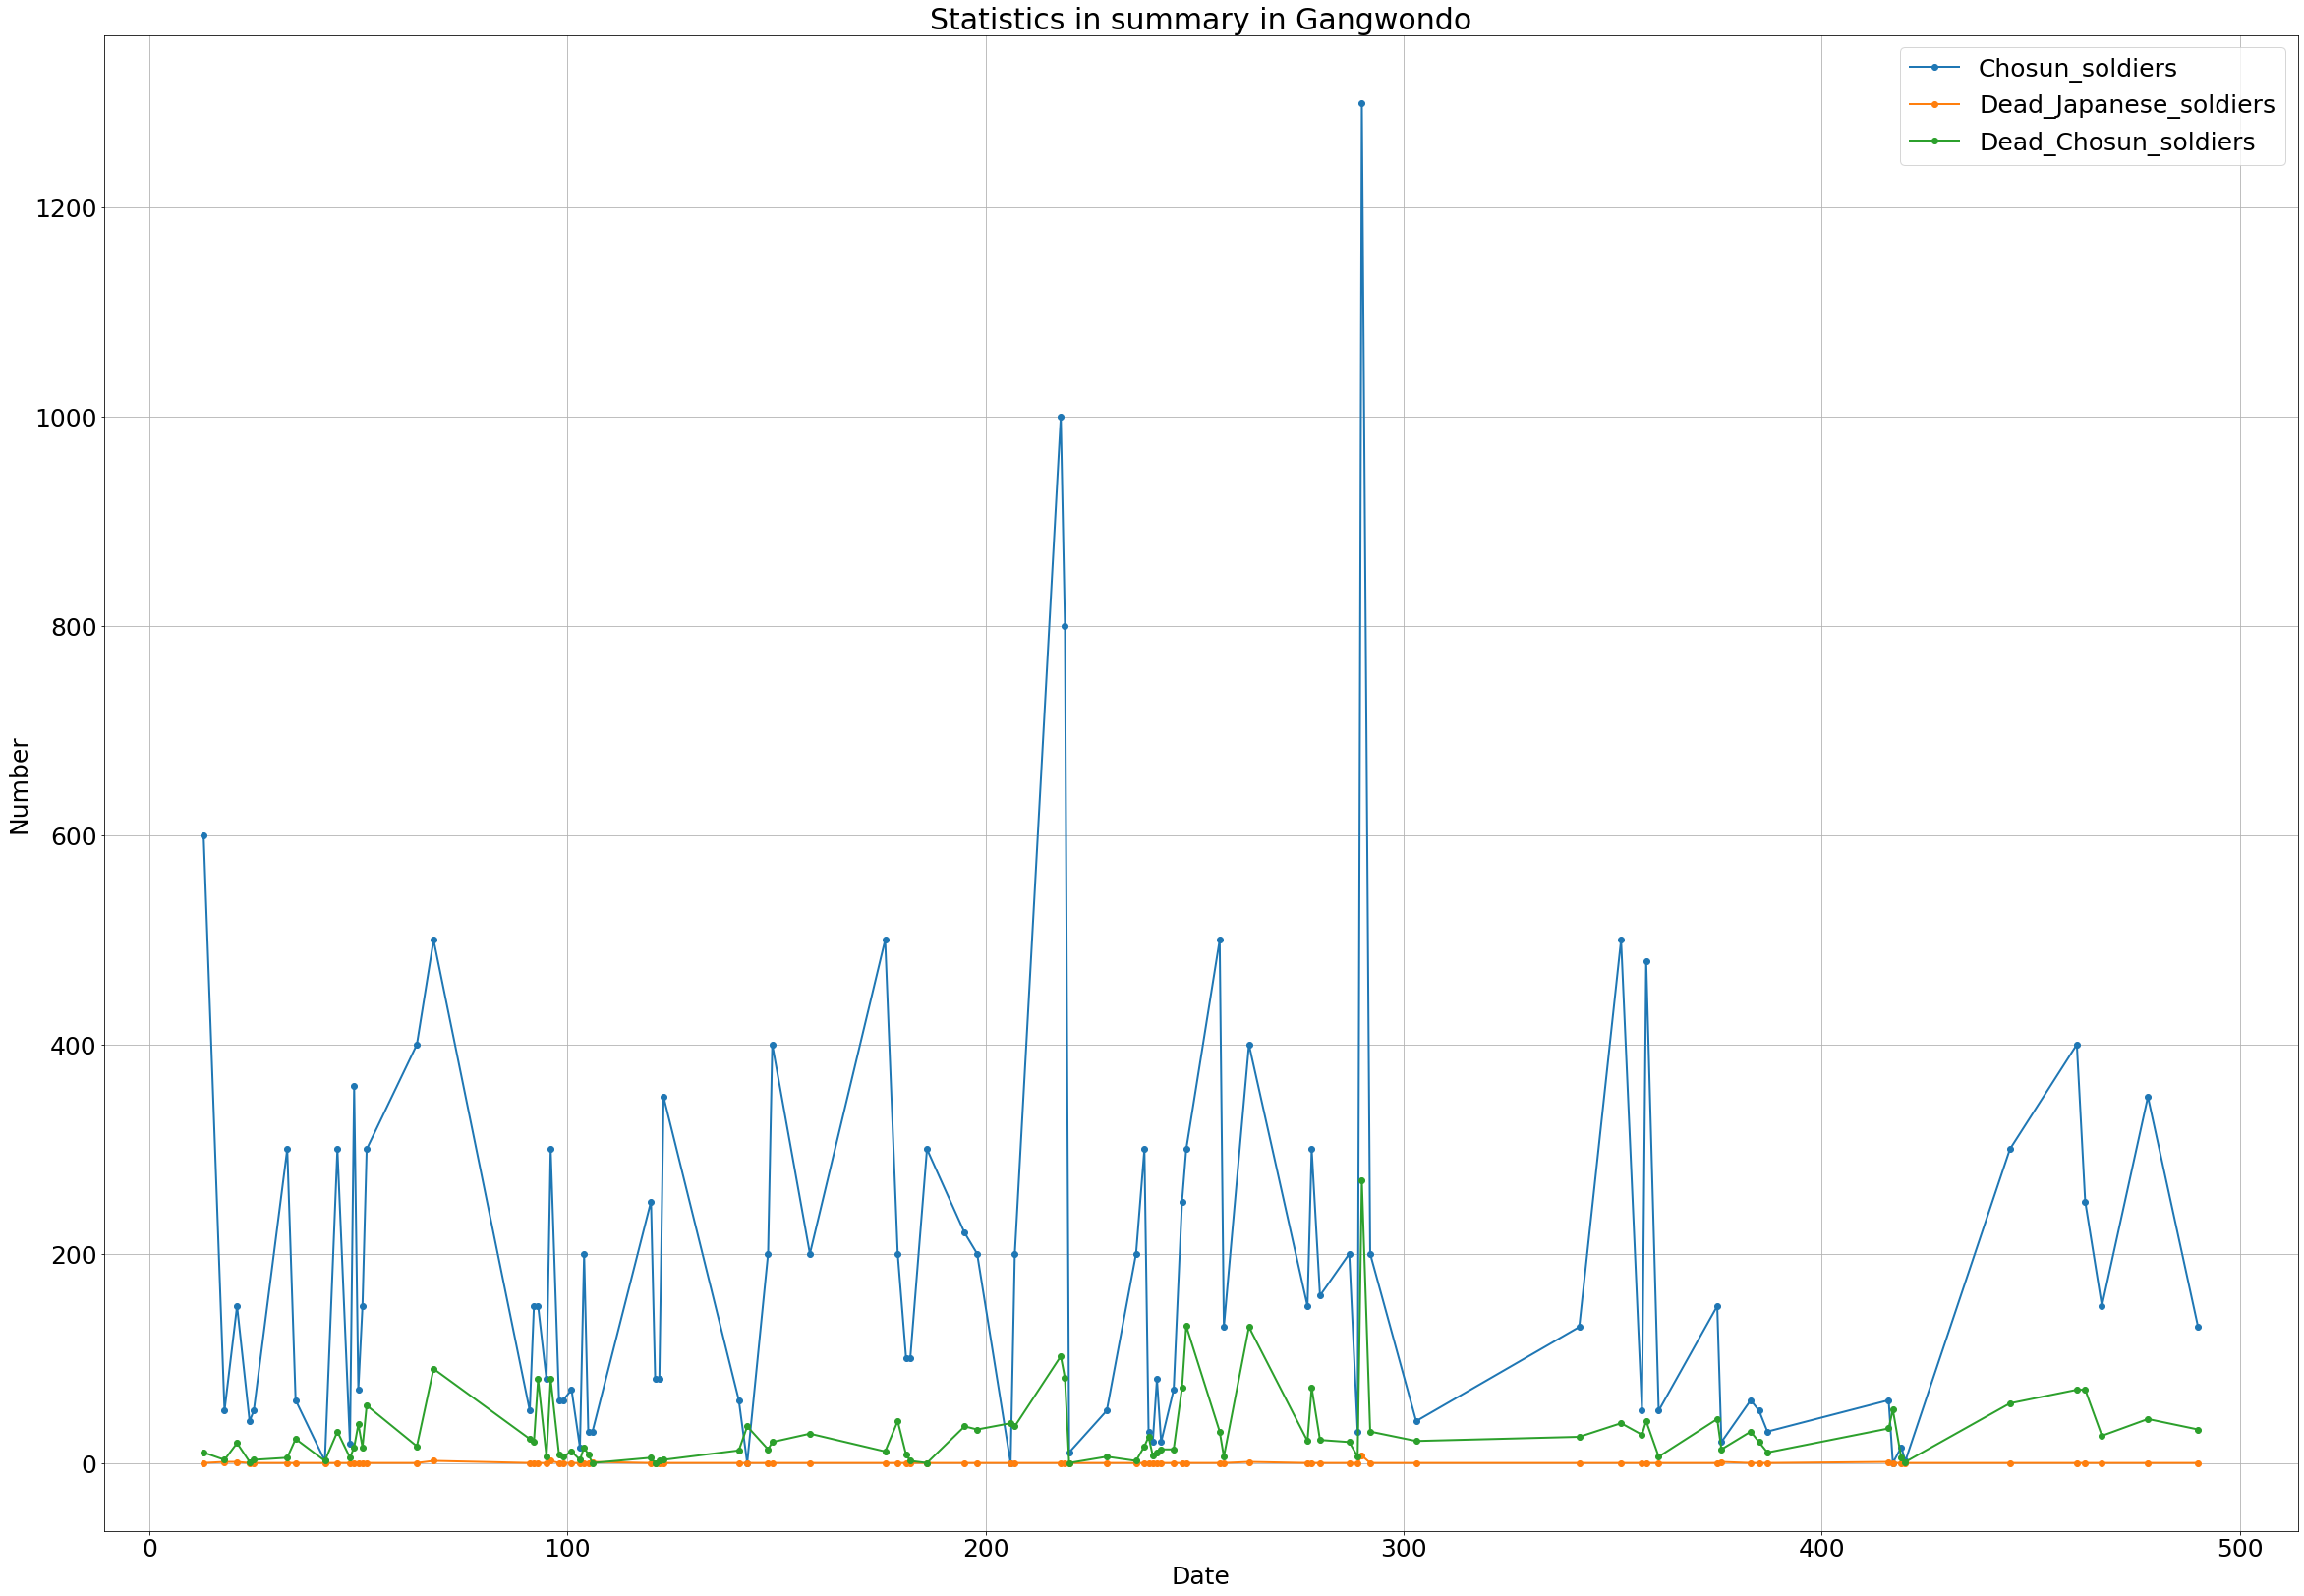

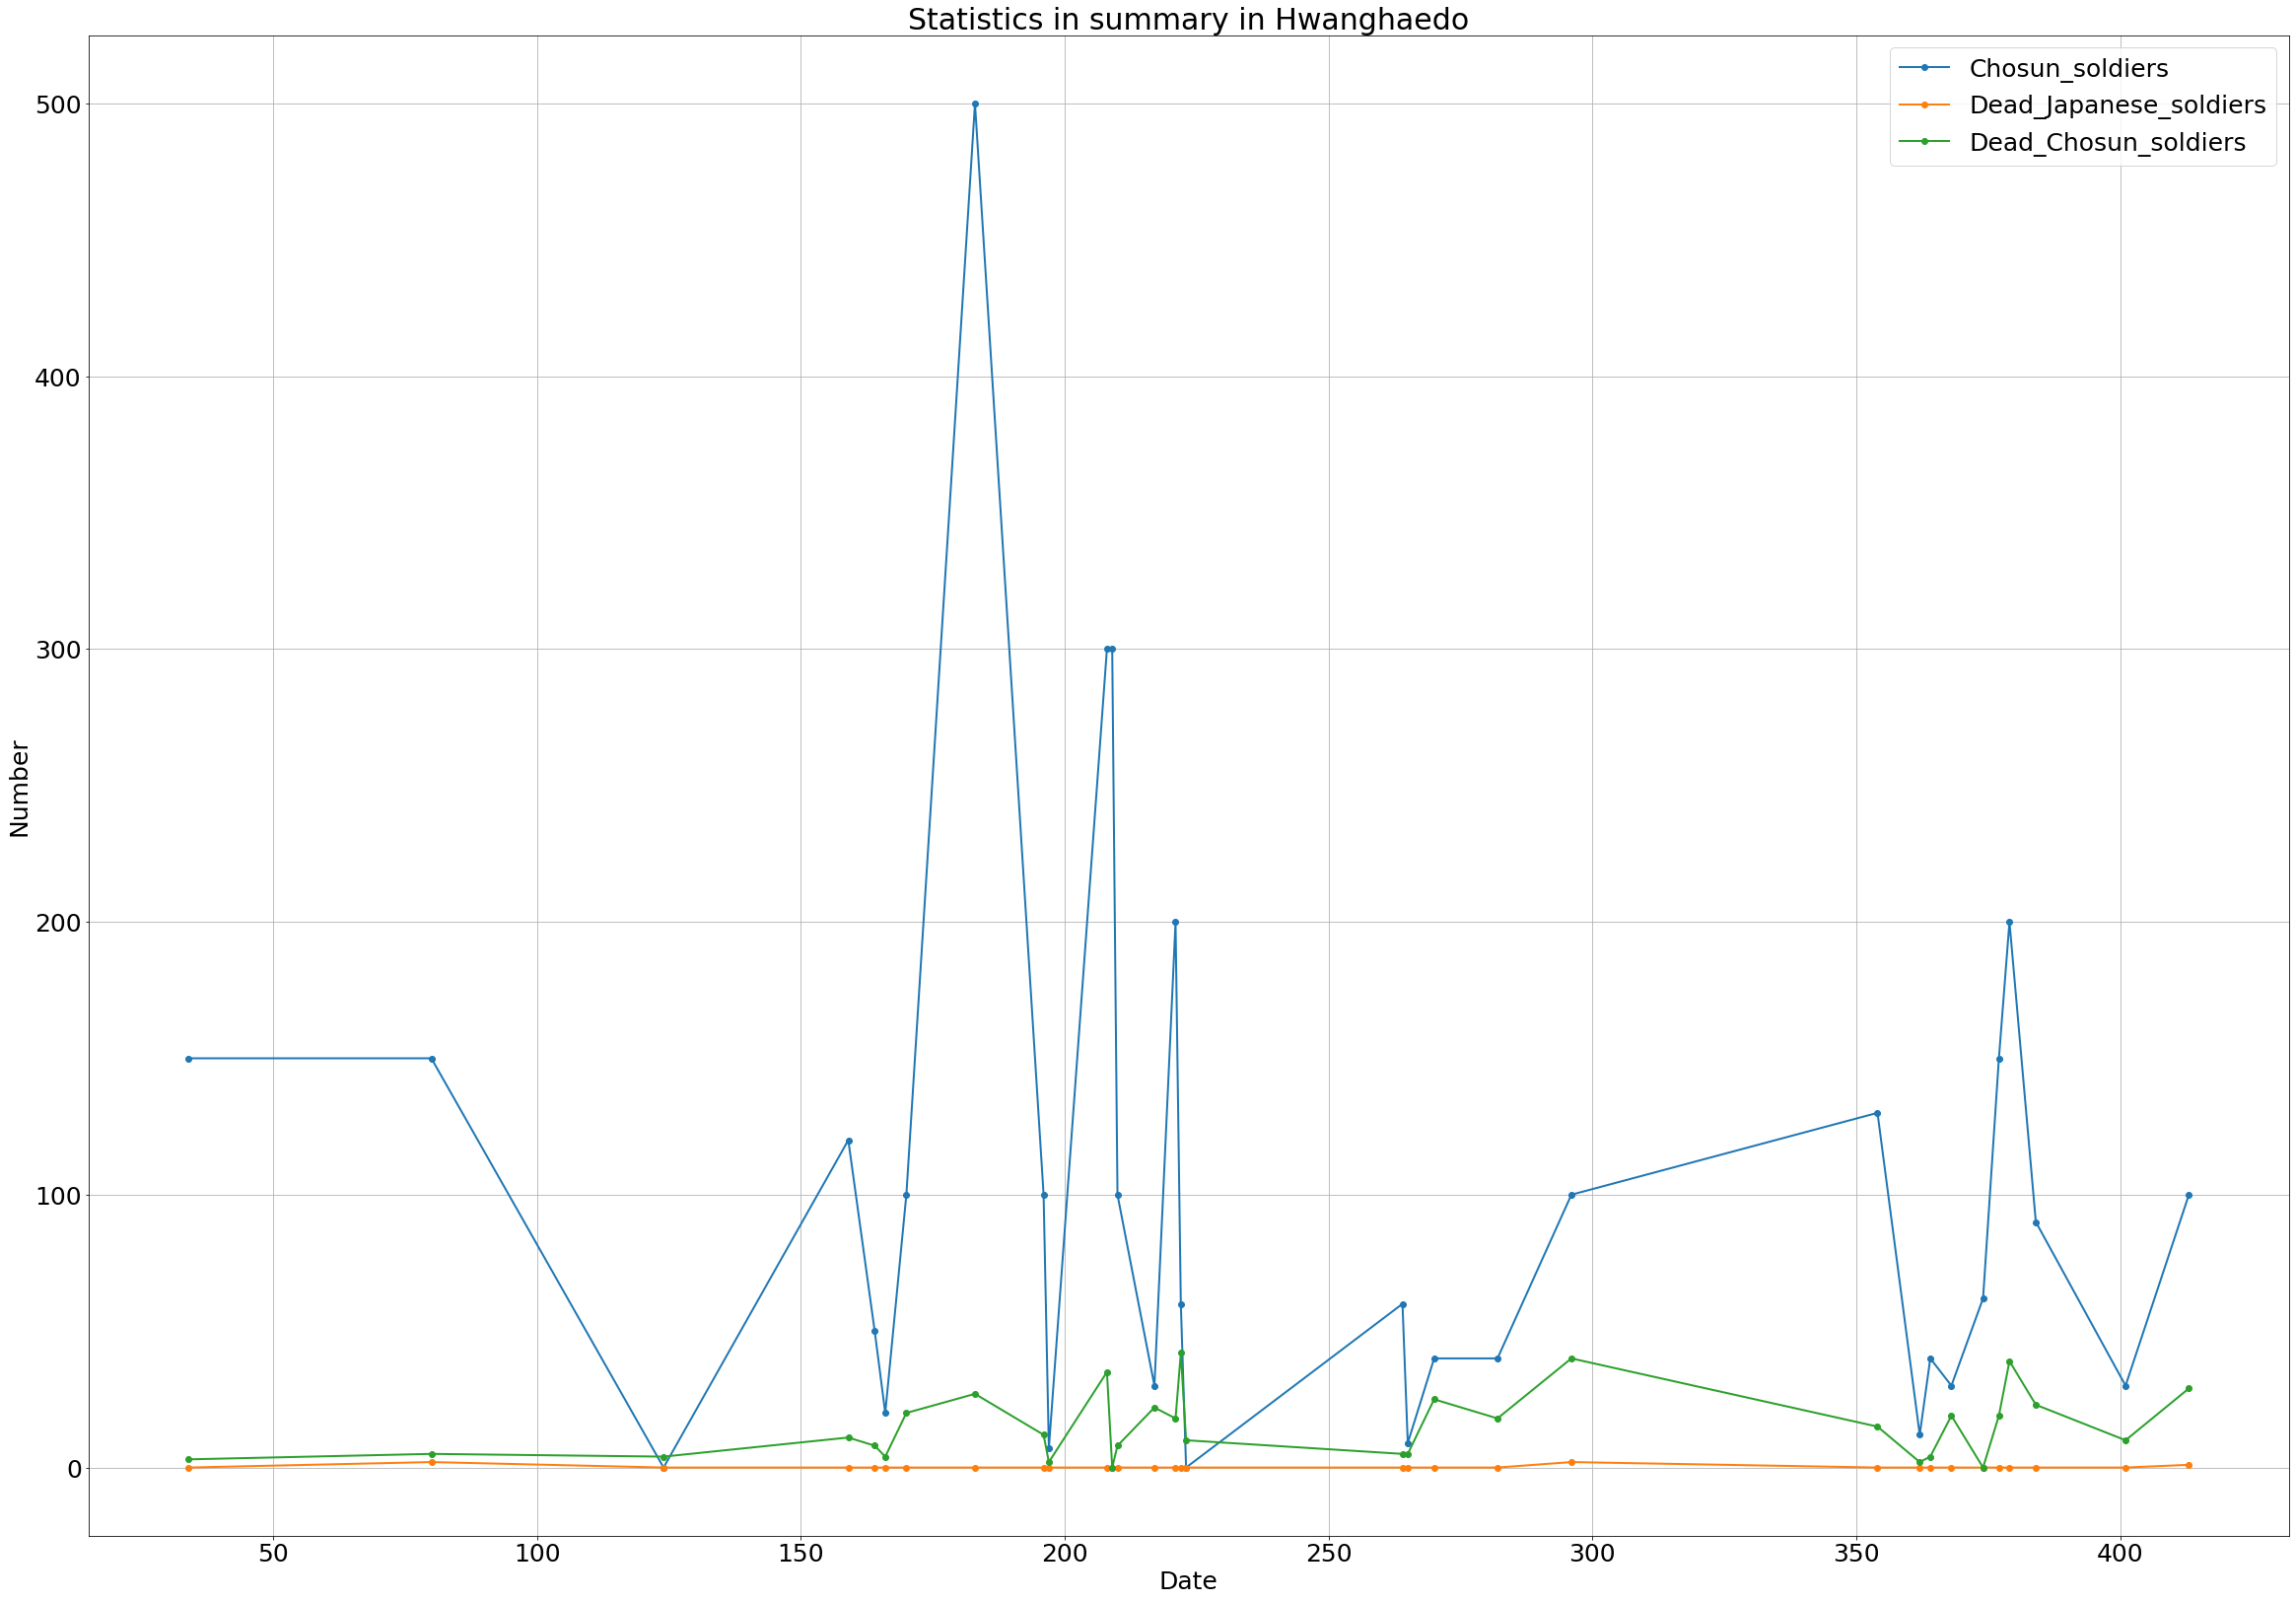

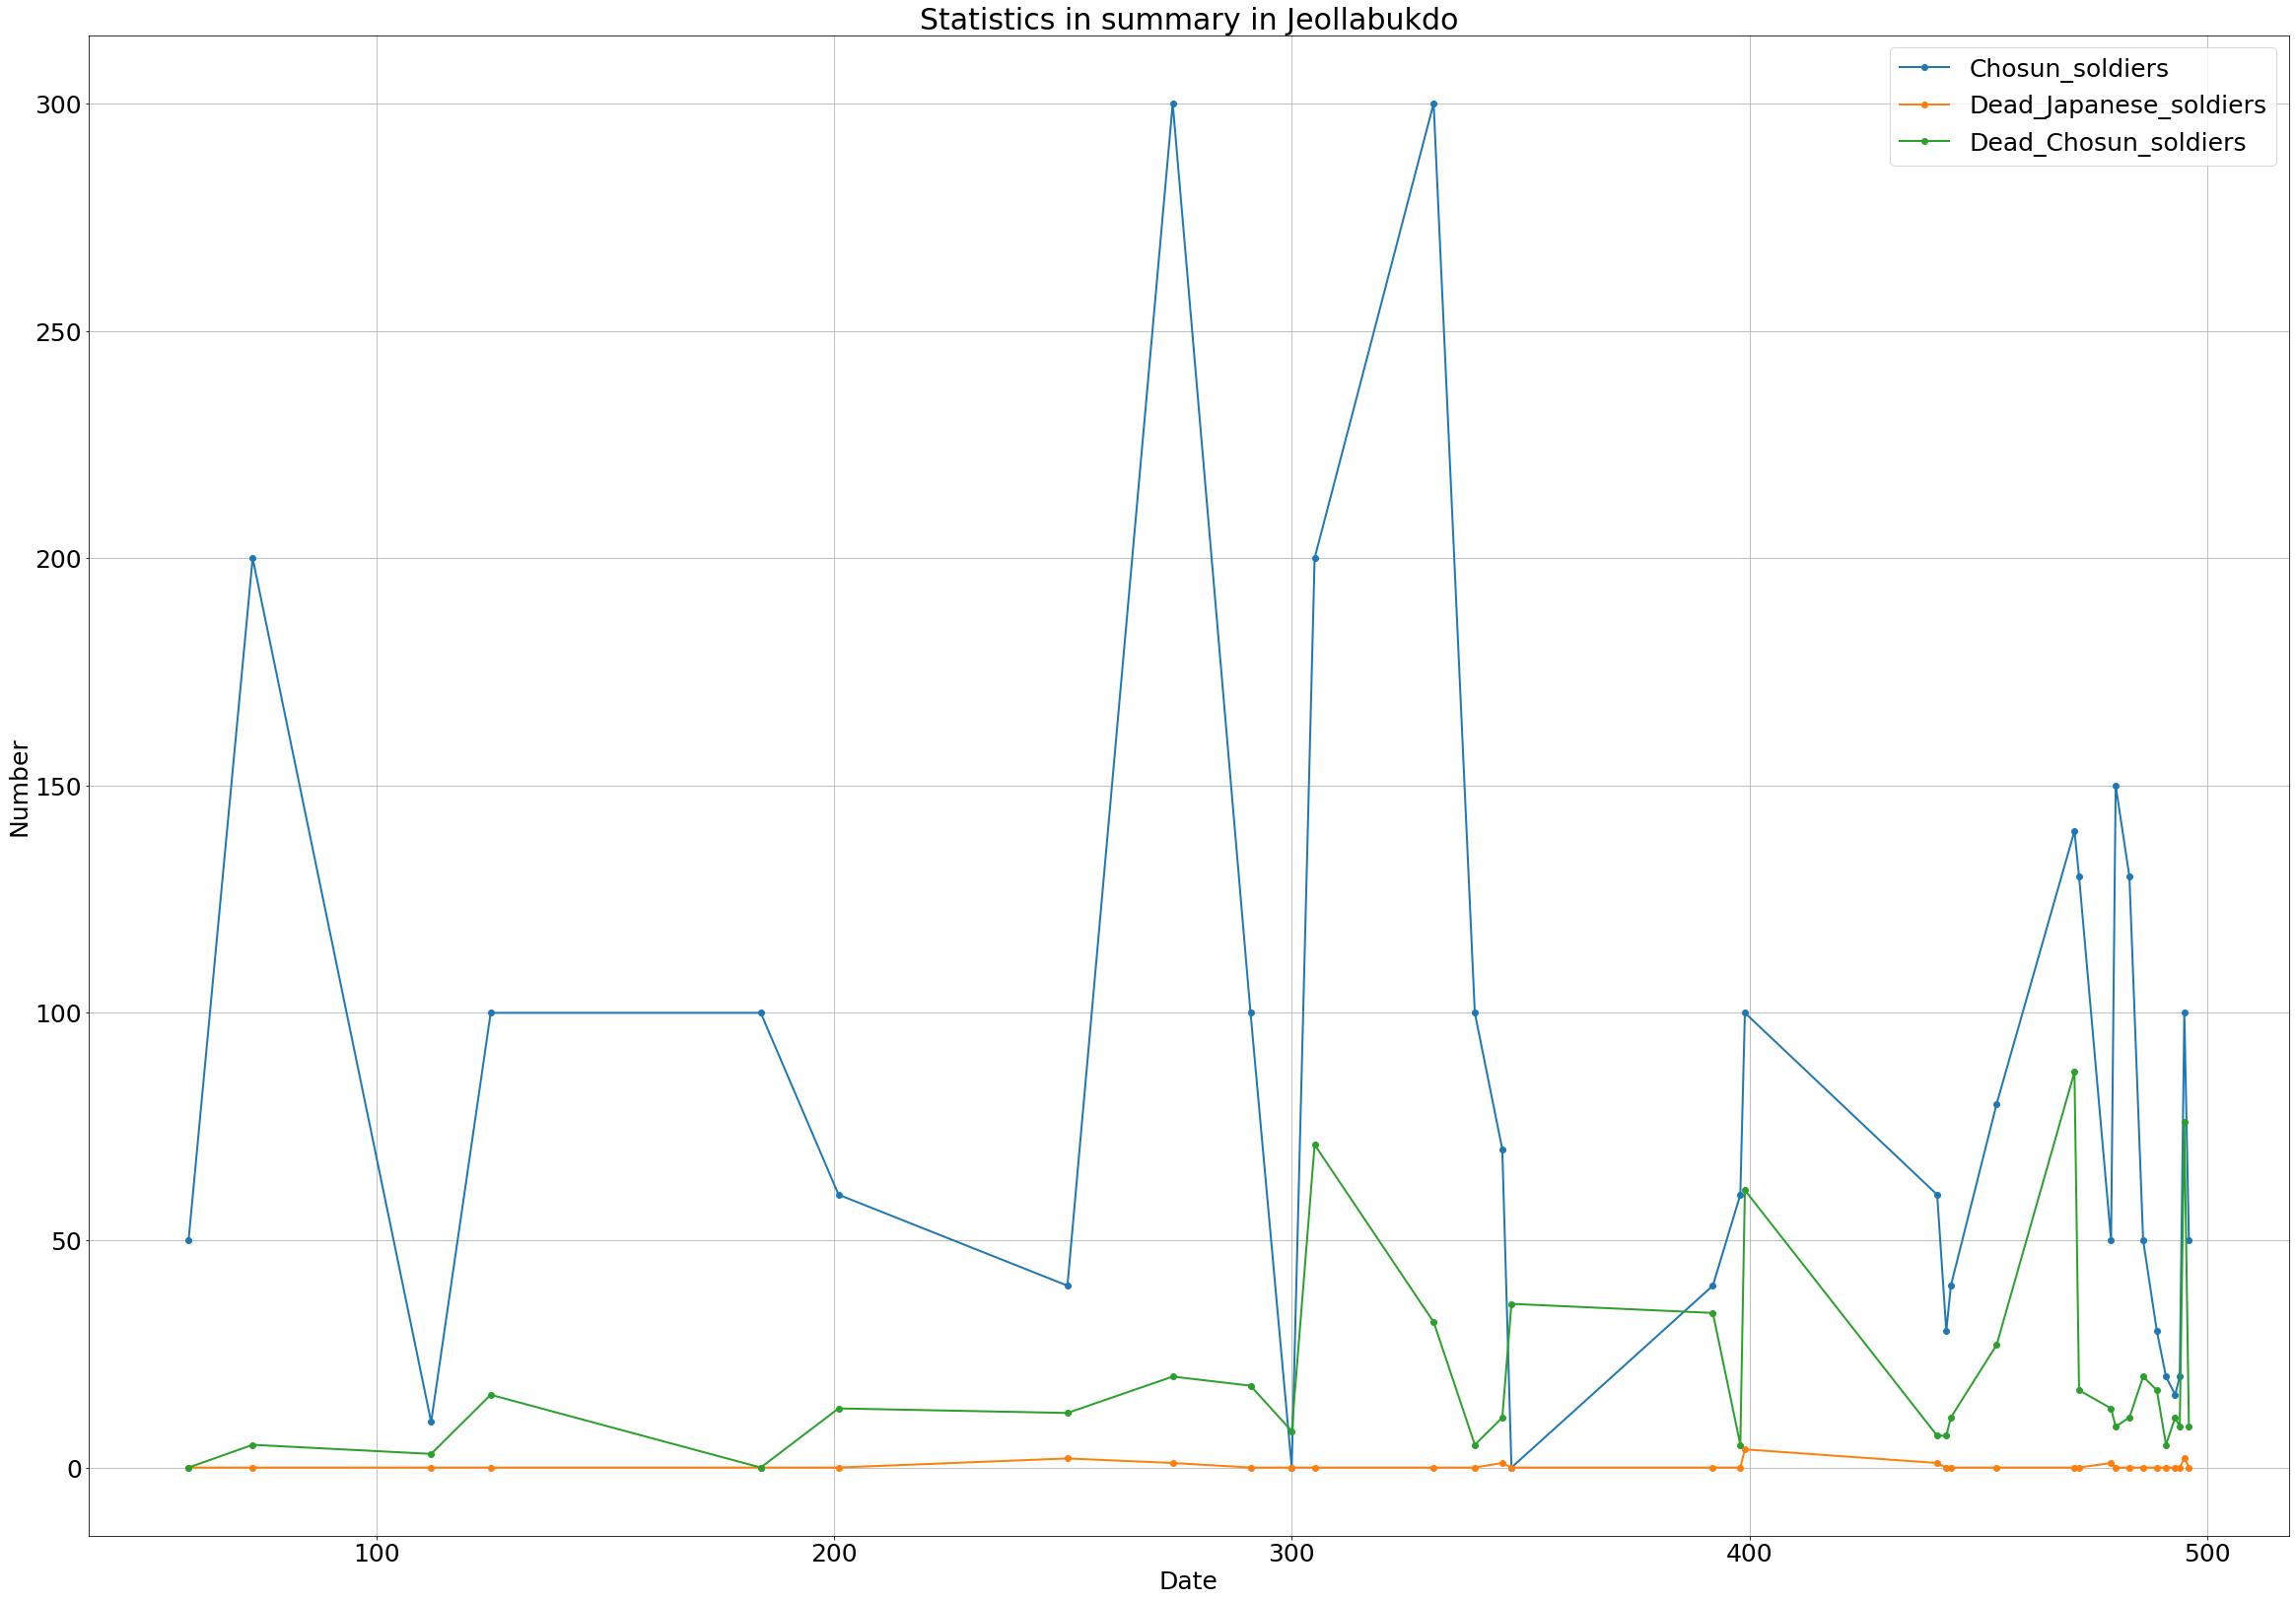

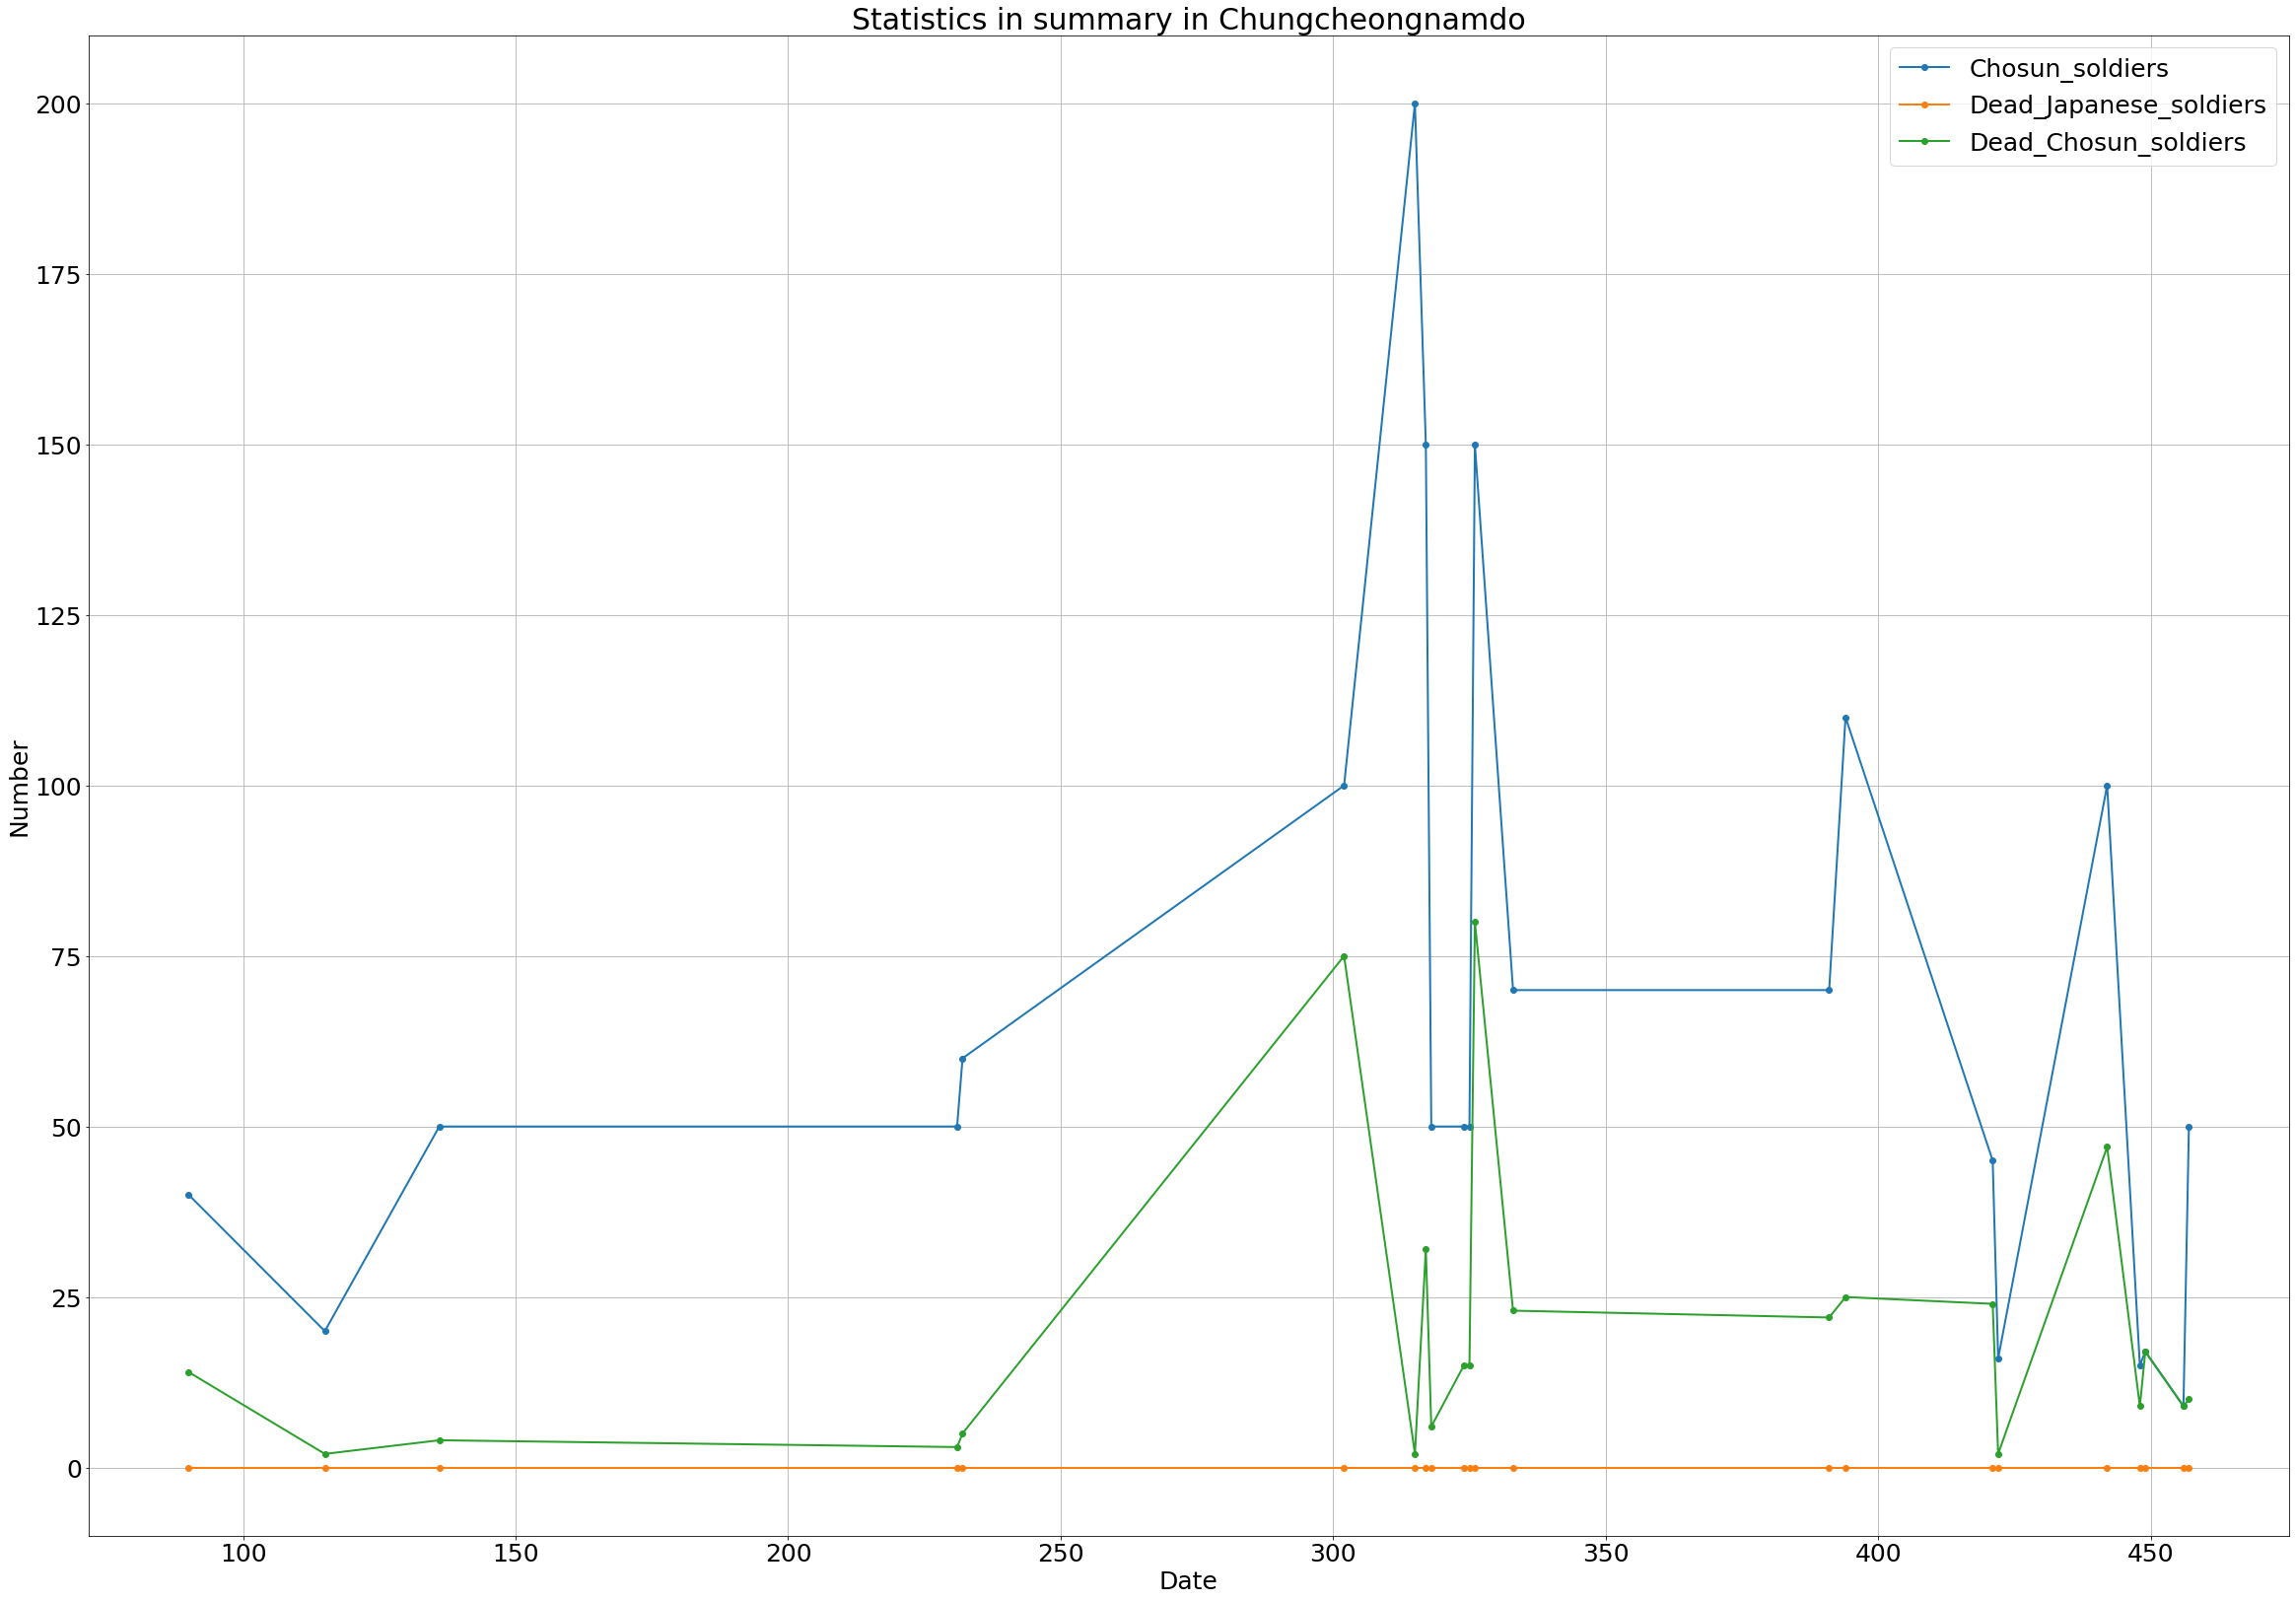

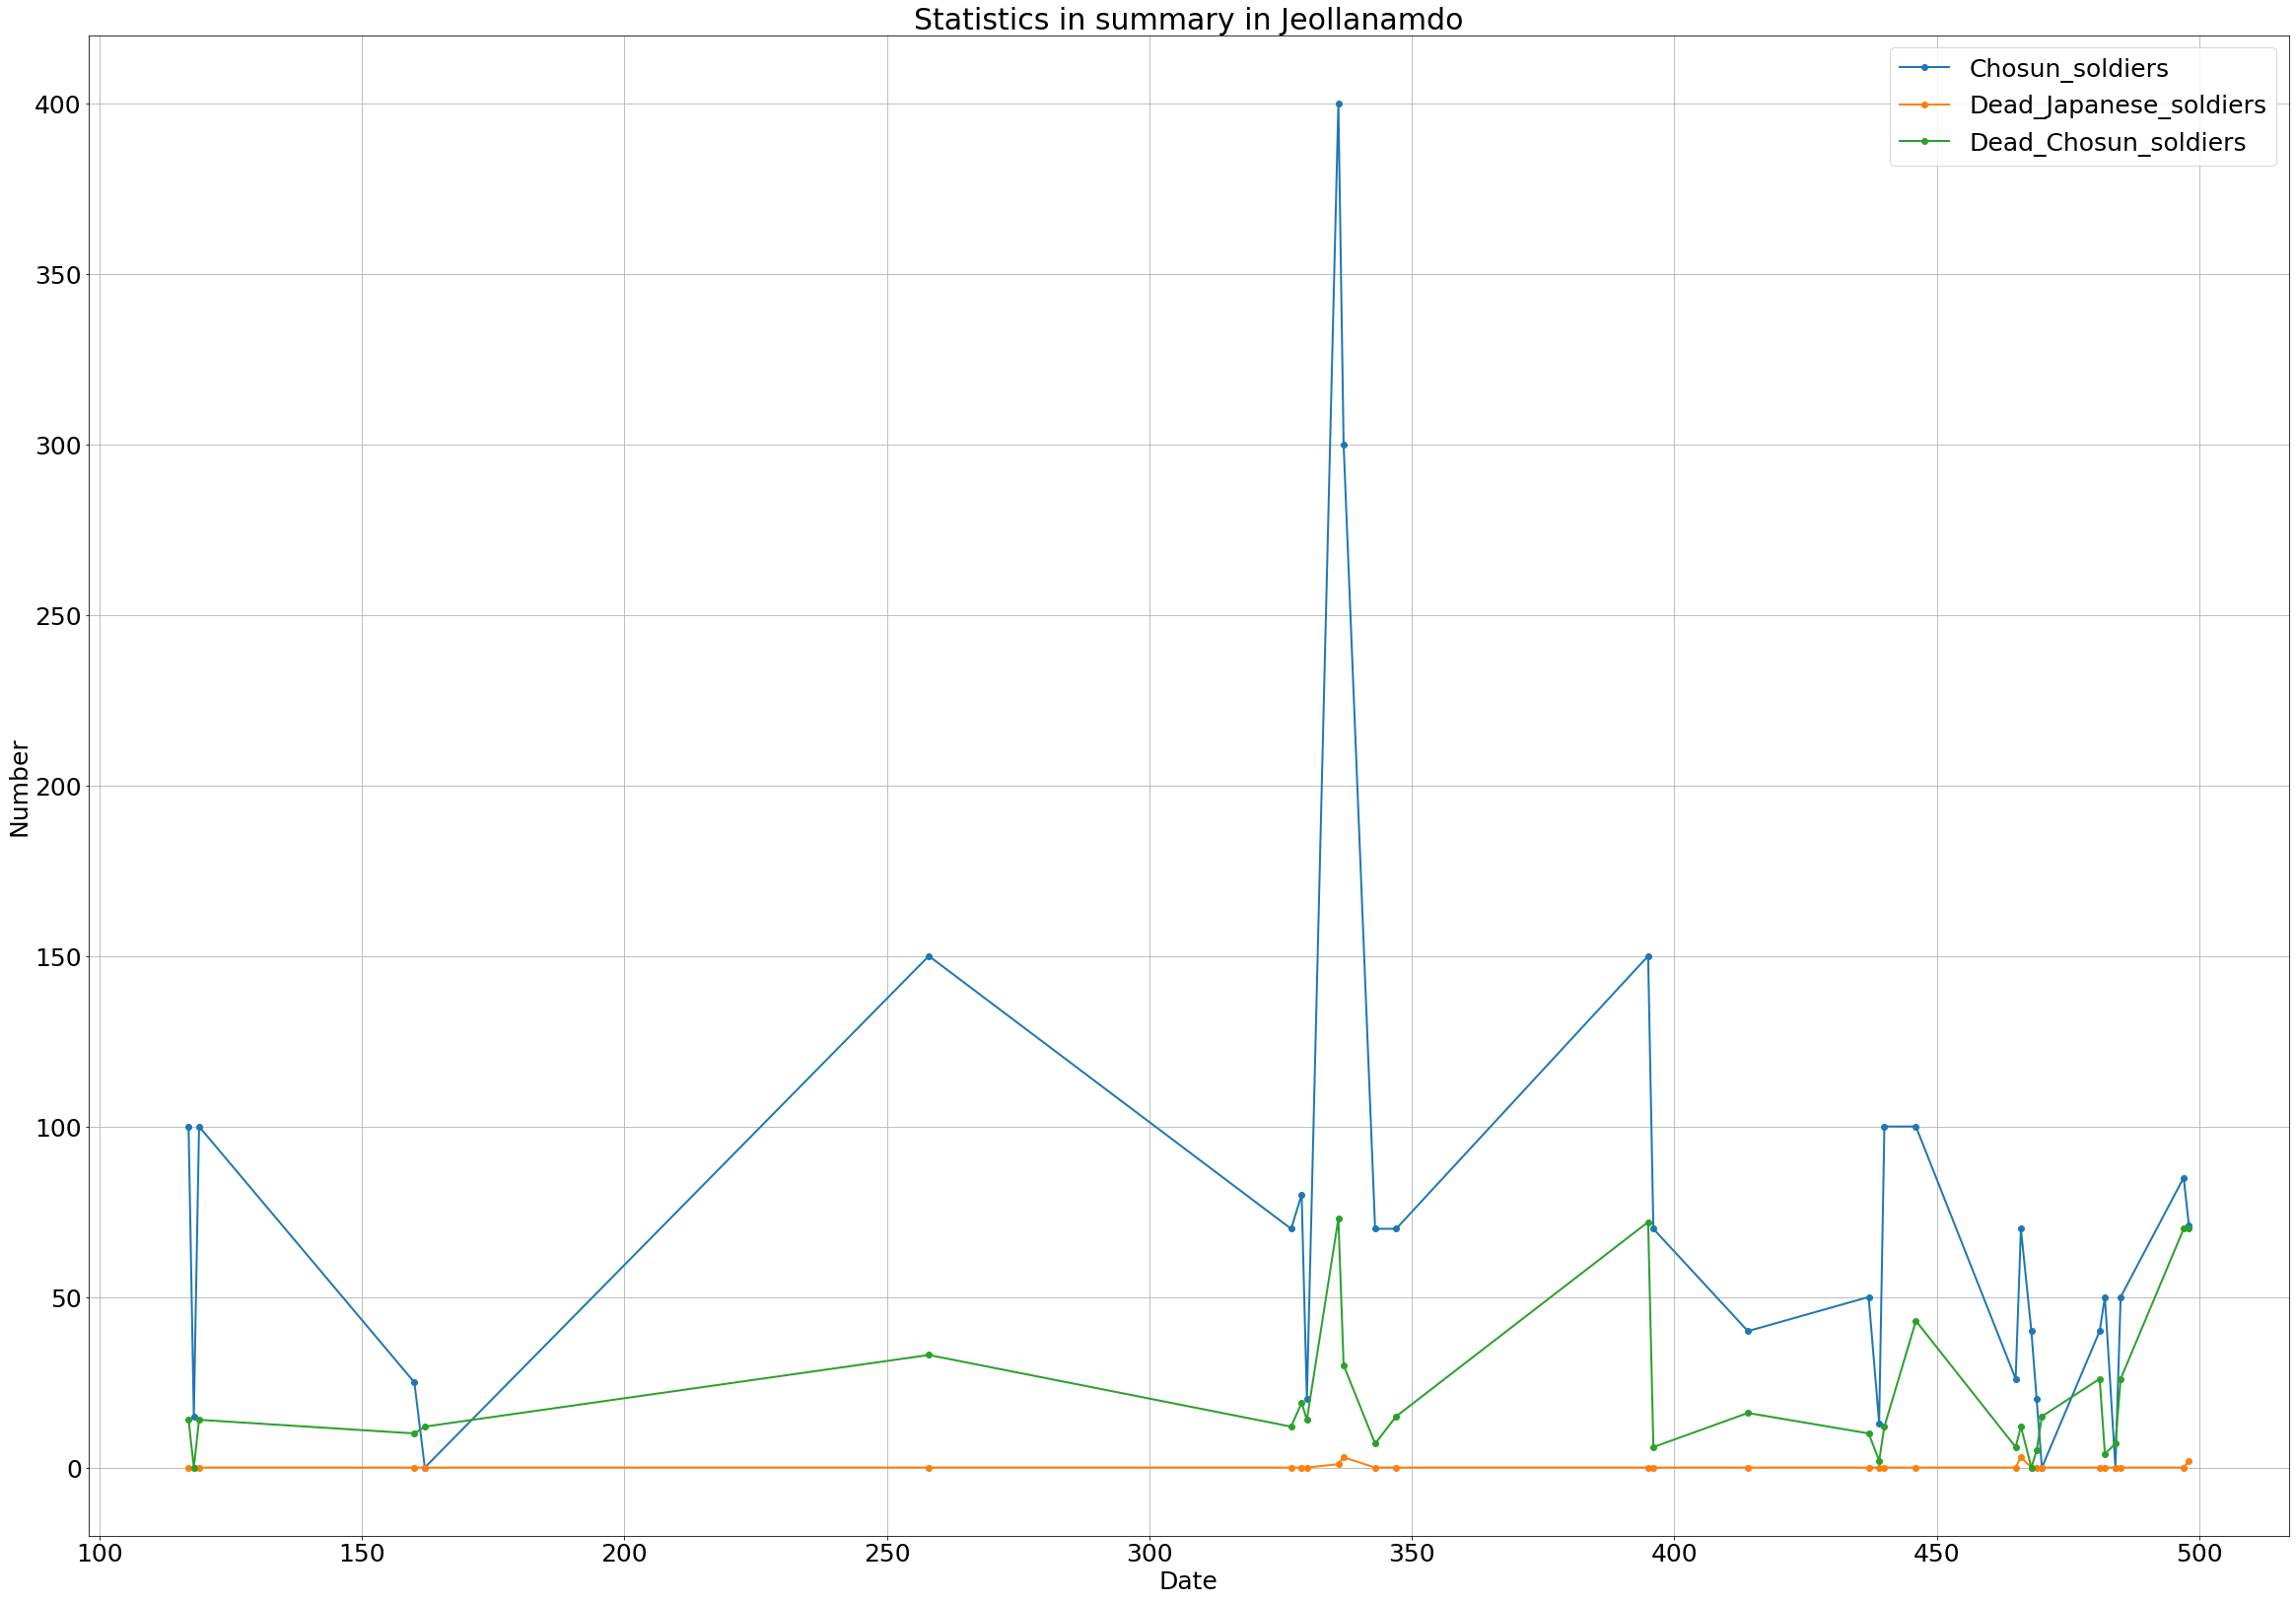

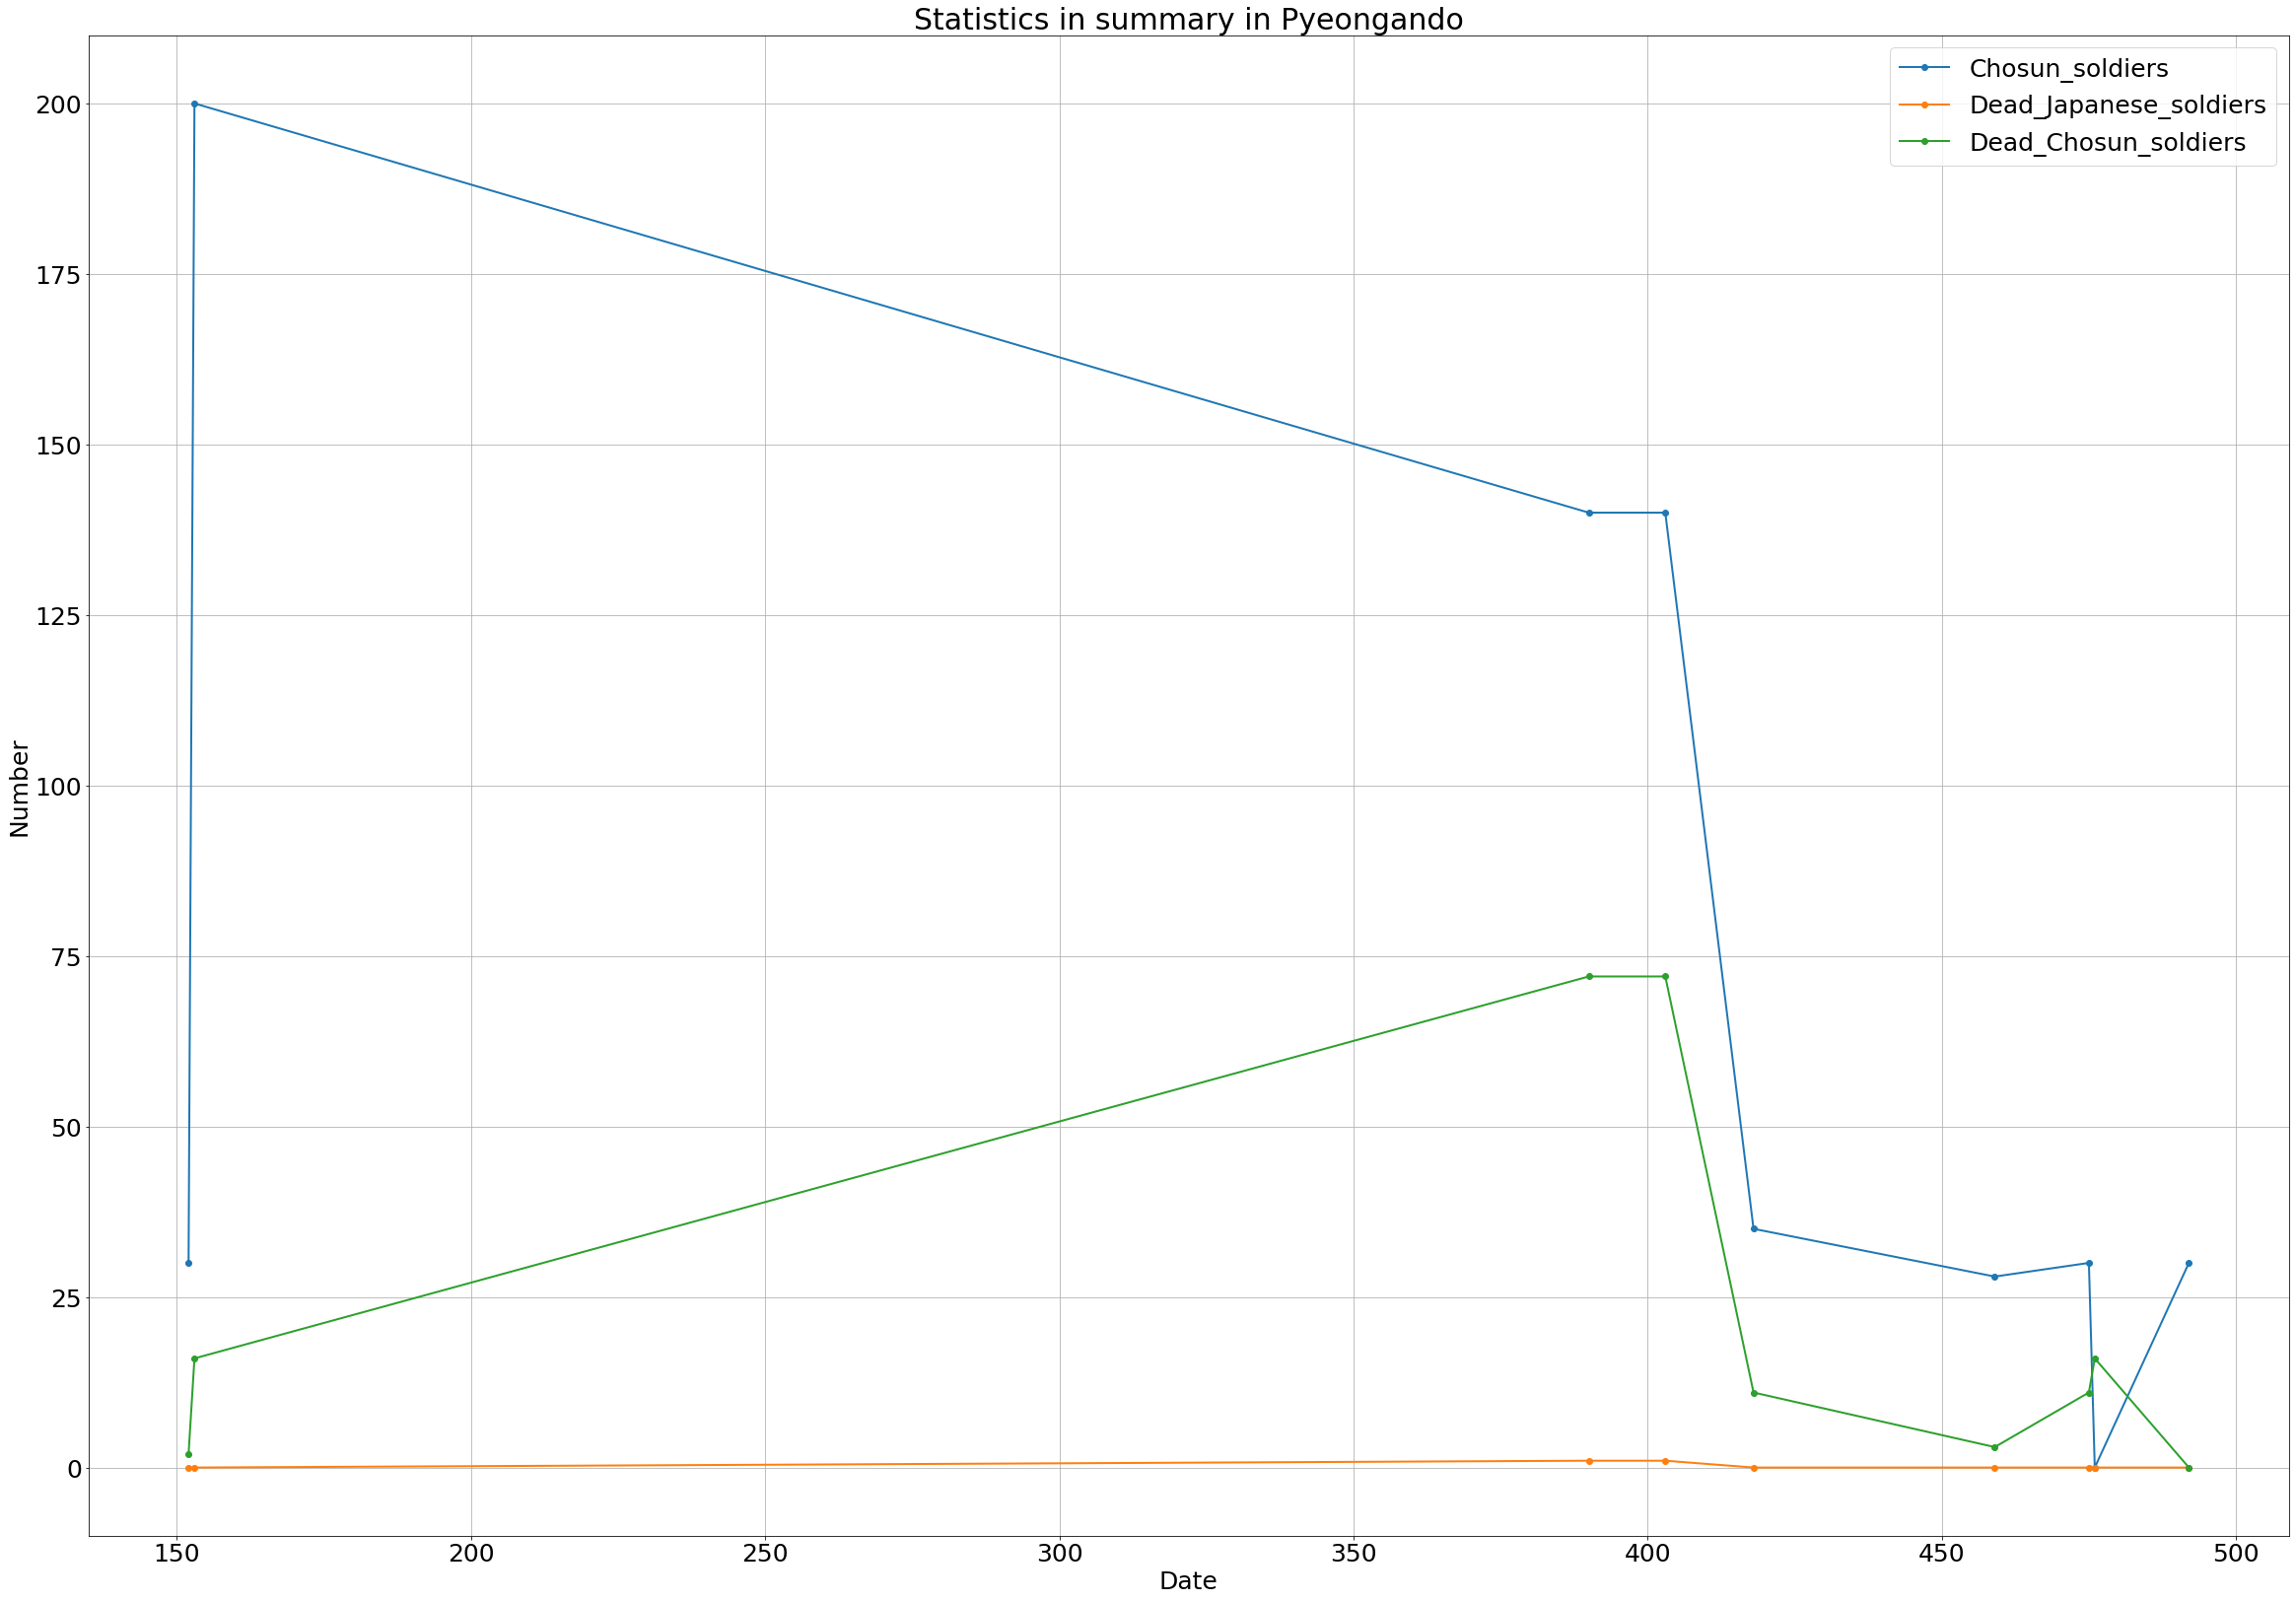

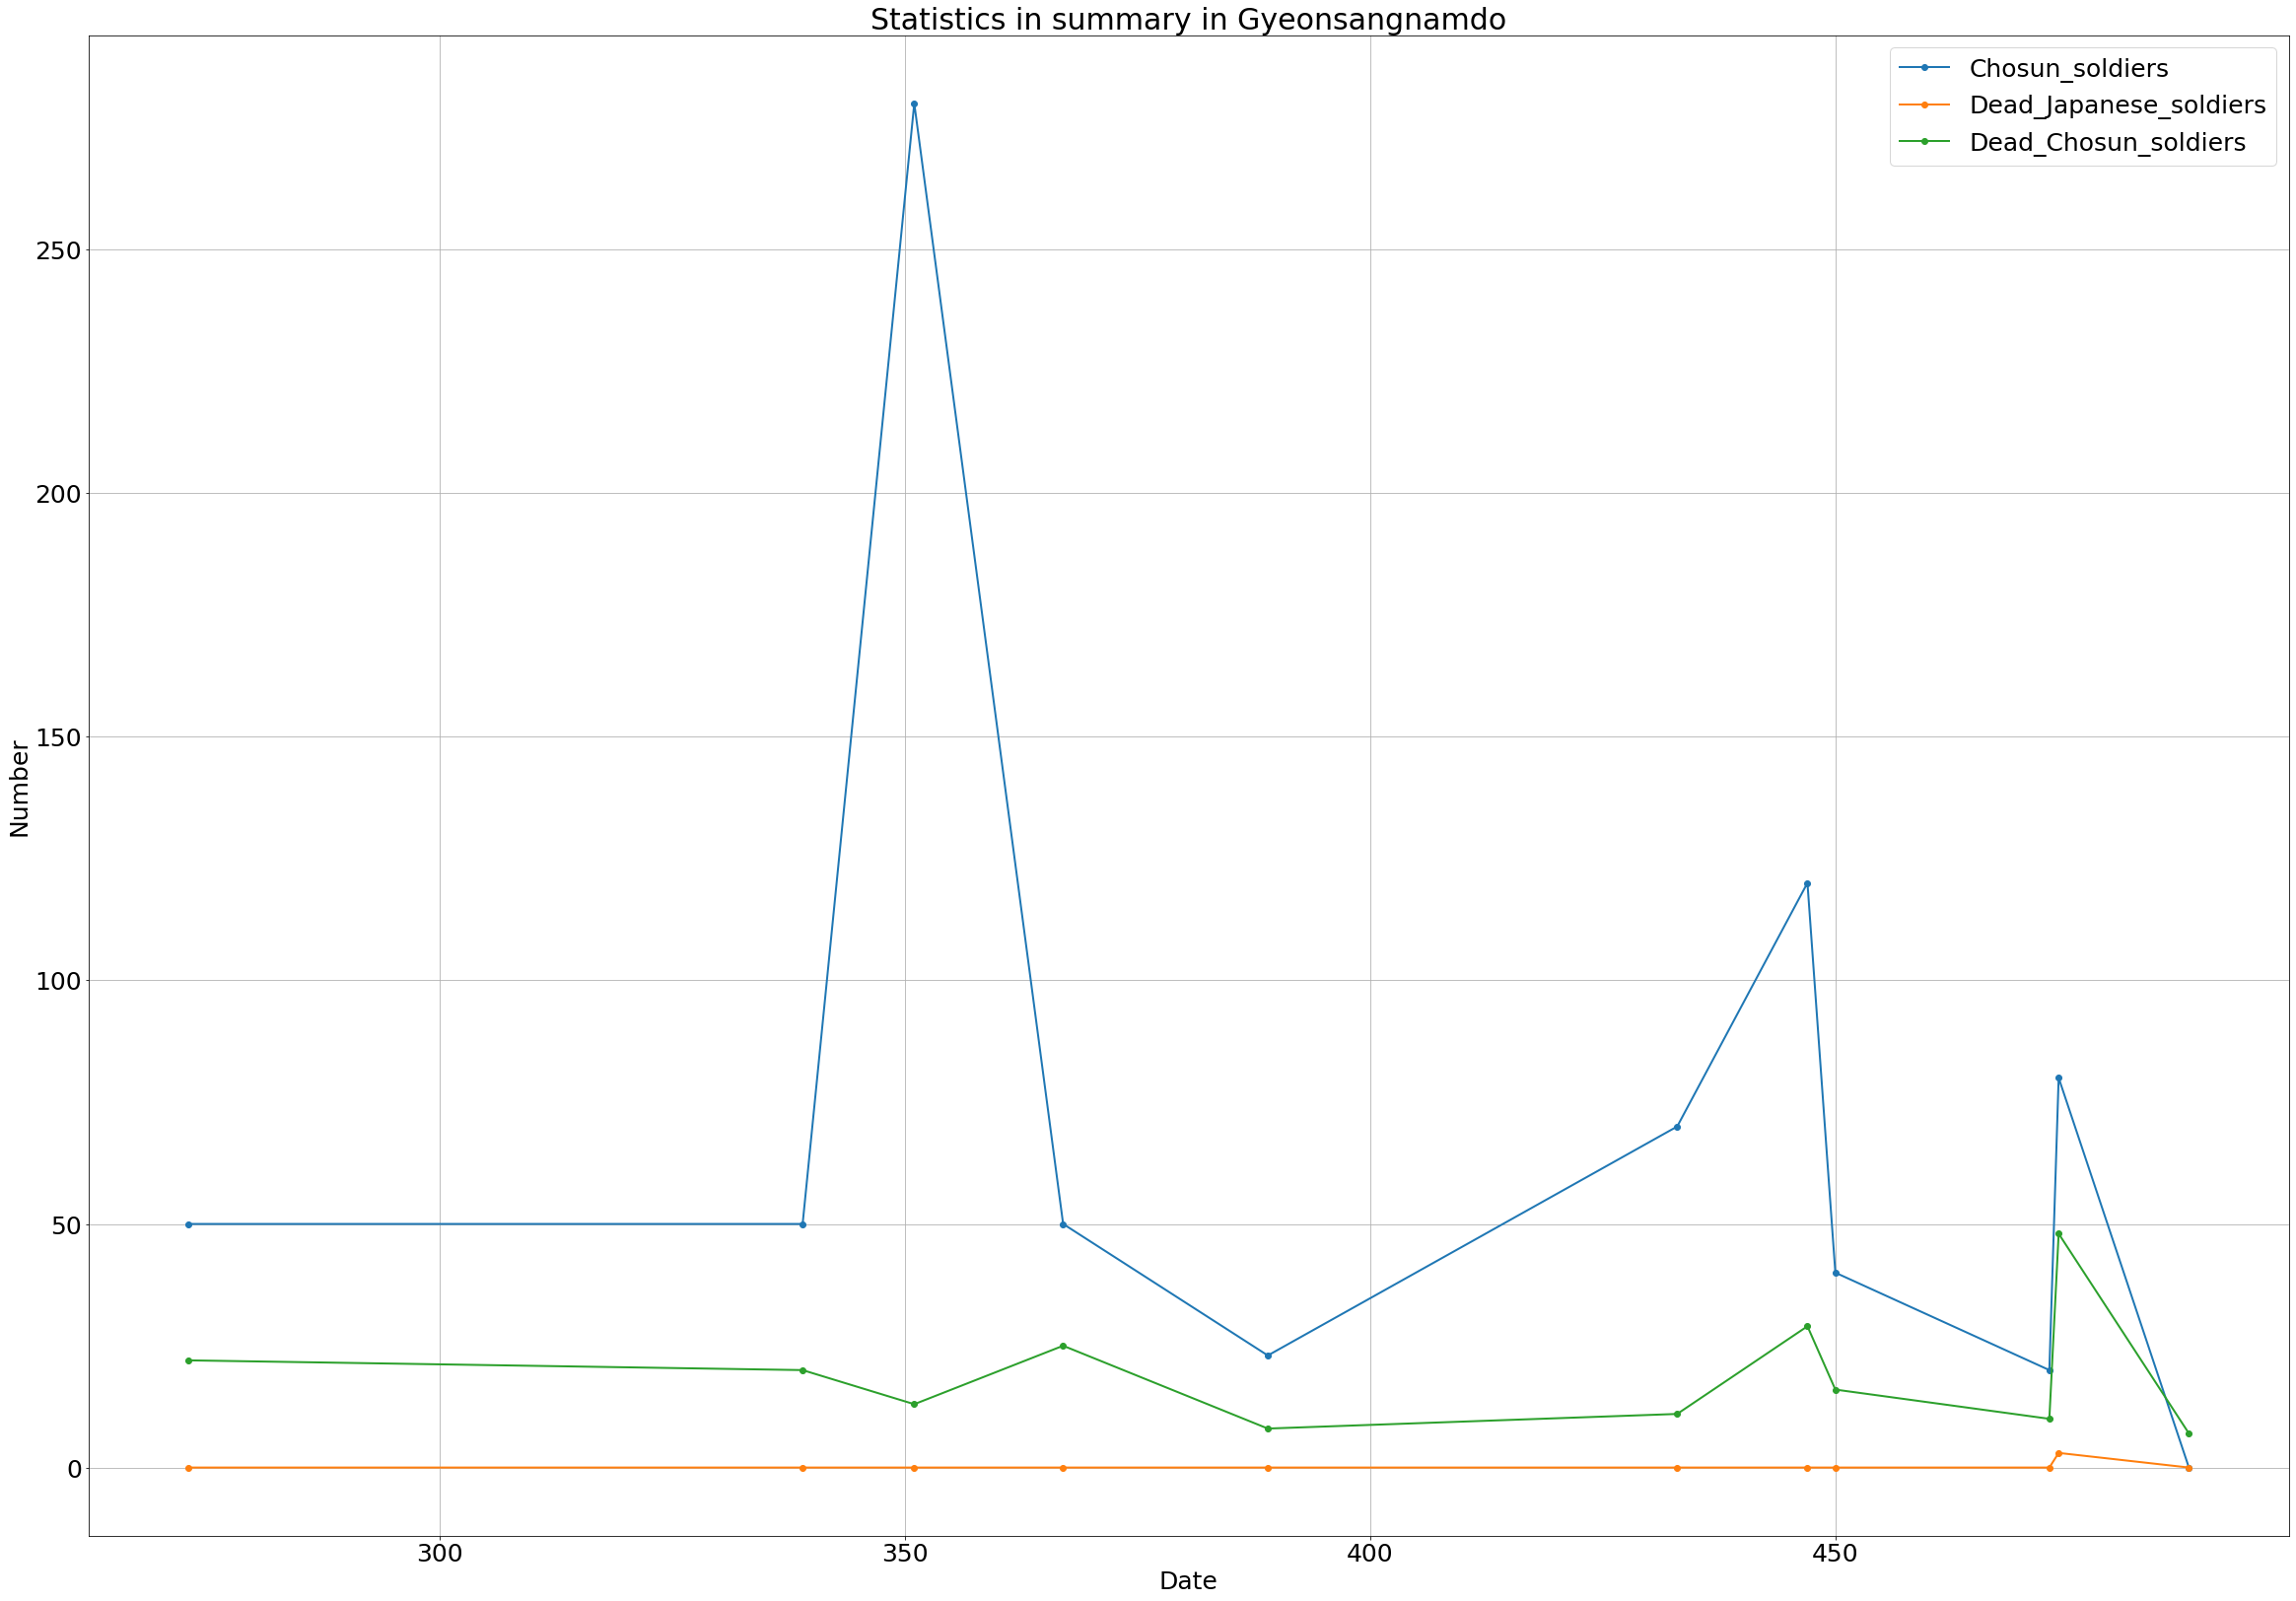

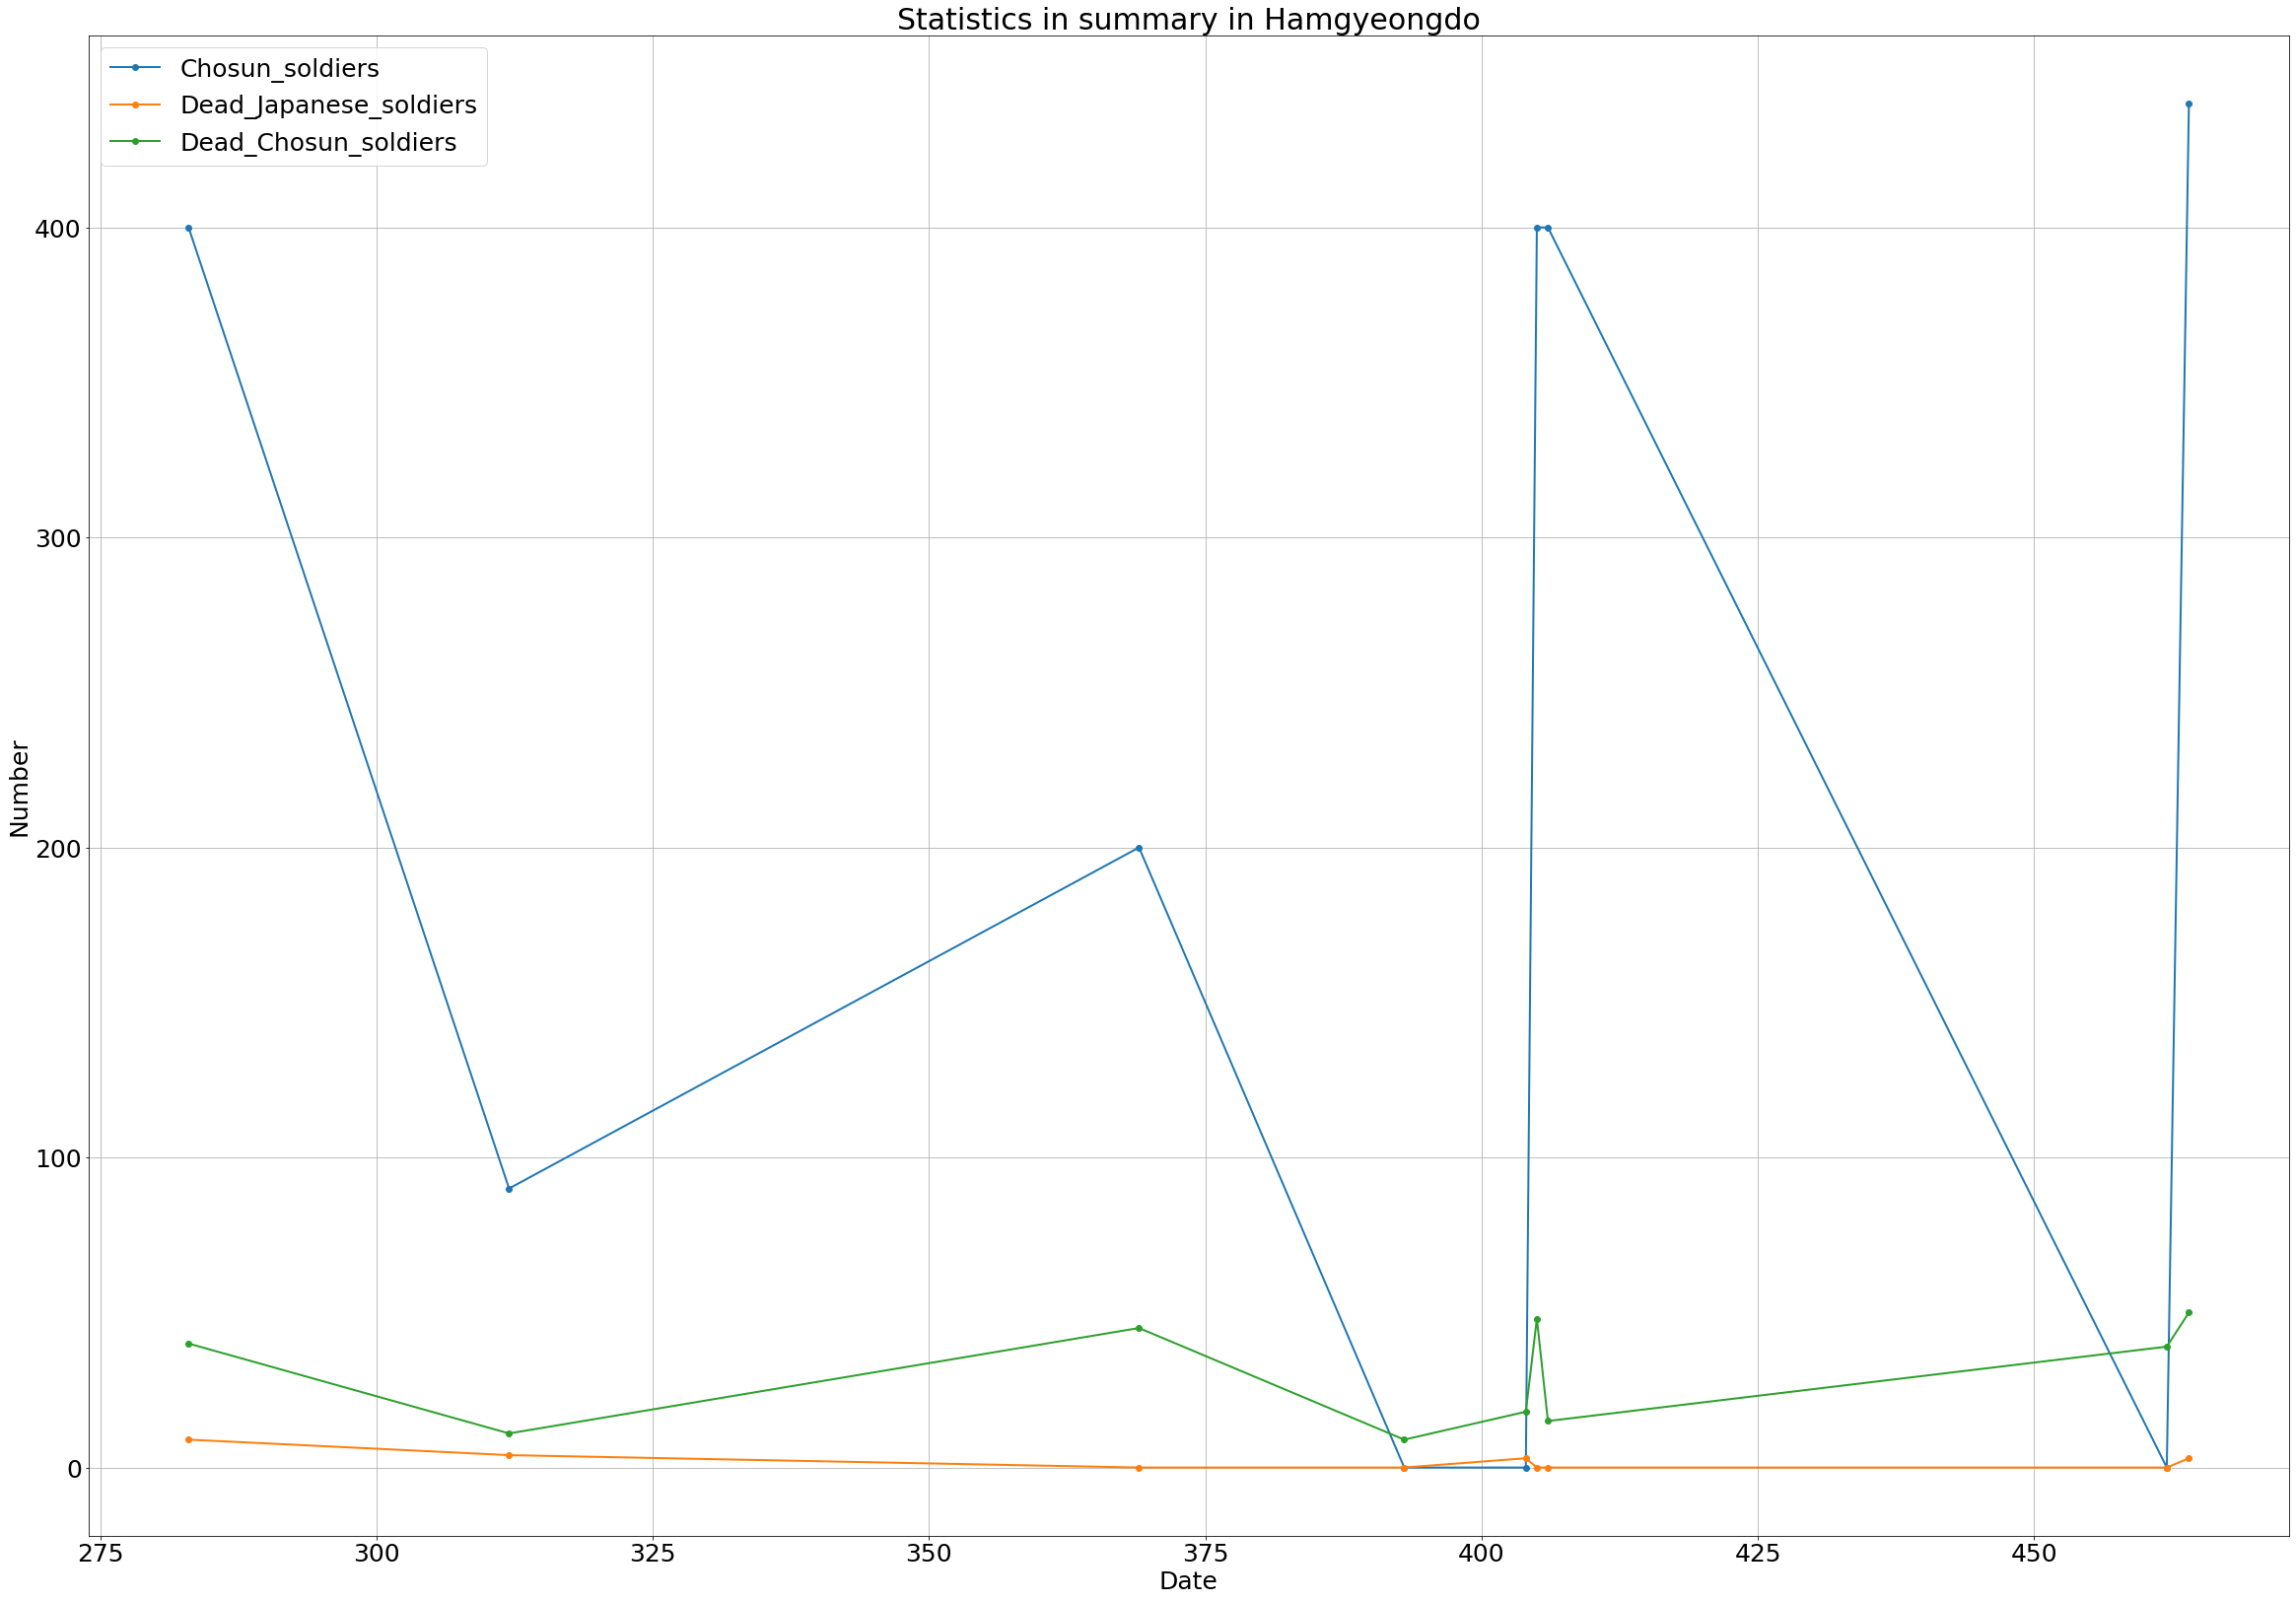

In [359]:
for reg in list(df_final['Region'].unique()):
    region = df_final[df_final['Region'].str.contains(f"{reg}")]
    region.plot(marker='o')
    plt.title(f"Statistics in summary in {reg}")
    plt.xlabel("Date")
    plt.ylabel("Number")
    plt.show()

끝. 필요한 거 있으면 말하셈.